APLICACIÓN DE LA CIENCIA DE DATOS PARA LA ELABORACIÓN DE UN MODELO DE PREDICCIÓN DE RIESGO DE COLAPSO HOSPITALARIO A PARTIR DE DATOS DISPONIBLES









1. Las bases de egresos y urgencias fueron previamente modificadas en R para reducir el tamano de las bases de datos.







Primer Acercamiento a los Datos
---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as s

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
recursos = pd.read_csv("/content/drive/MyDrive/ICD/base_Recursos_ICD.csv")

In [4]:
recursos.head()

,CLUES,CLAVE.ENTIDAD,ENTIDAD,CLAVE.JURISDICCIÓN,JURISDICCIÓN,CLAVE.MUNICIPIO,MUNICIPIO,CLAVE.LOCALIDAD,LOCALIDAD,TIPO.DE.ESTABLECIMIENTO,...,C1746,C1747,C1749,C1730,Año,E18,X,X.1,X.2,X.3
0,ASSSA000030,1.0,AGUASCALIENTES,1.0,AGUASCALIENTES,1.0,AGUASCALIENTES,1.0,AGUASCALIENTES,HO,...,0.0,0.0,0.0,0.0,2020.0,NaN,NaN,NaN,NaN,NaN
1,ASSSA000042,1.0,AGUASCALIENTES,1.0,AGUASCALIENTES,1.0,AGUASCALIENTES,1.0,AGUASCALIENTES,HO,...,0.0,1.0,0.0,0.0,2020.0,NaN,NaN,NaN,NaN,NaN
2,ASSSA000054,1.0,AGUASCALIENTES,1.0,AGUASCALIENTES,1.0,AGUASCALIENTES,1.0,AGUASCALIENTES,HO,...,0.0,0.0,0.0,0.0,2020.0,NaN,NaN,NaN,NaN,NaN
3,ASSSA000404,1.0,AGUASCALIENTES,3.0,CALVILLO,3.0,CALVILLO,1.0,CALVILLO,HO,...,0.0,0.0,0.0,0.0,2020.0,NaN,NaN,NaN,NaN,NaN
4,ASSSA000614,1.0,AGUASCALIENTES,2.0,RINCÓN DE ROMOS,6.0,PABELLÓN DE ARTEAGA,1.0,PABELLON DE ARTEAGA,HO,...,0.0,0.0,0.0,0.0,2020.0,NaN,NaN,NaN,NaN,NaN


In [5]:
print(recursos.shape)

recursos.columns

(56964, 151)


Index(['CLUES', 'CLAVE.ENTIDAD', 'ENTIDAD', 'CLAVE.JURISDICCIÓN',
       'JURISDICCIÓN', 'CLAVE.MUNICIPIO', 'MUNICIPIO', 'CLAVE.LOCALIDAD',
       'LOCALIDAD', 'TIPO.DE.ESTABLECIMIENTO',
       ...
       'C1746', 'C1747', 'C1749', 'C1730', 'Año', 'E18', 'X', 'X.1', 'X.2',
       'X.3'],
      dtype='object', length=151)

In [6]:
recursos['ENTIDAD'].unique()

array(['AGUASCALIENTES', 'BAJA CALIFORNIA', 'BAJA CALIFORNIA SUR',
       'CAMPECHE', 'CHIHUAHUA', 'COAHUILA DE ZARAGOZA', 'COLIMA',
       'CHIAPAS', 'CIUDAD DE MEXICO', 'DURANGO', 'GUERRERO', 'GUANAJUATO',
       'HIDALGO', 'JALISCO', 'MEXICO', 'MICHOACAN DE OCAMPO', 'MORELOS',
       'NUEVO LEON', 'NAYARIT', 'OAXACA', 'PUEBLA', 'QUINTANA ROO',
       'QUERETARO', 'SINALOA', 'SAN LUIS POTOSI', 'SONORA', 'TABASCO',
       'TLAXCALA', 'TAMAULIPAS', 'VERACRUZ DE IGNACIO DE LA LLAVE',
       'YUCATAN', 'ZACATECAS', nan], dtype=object)

Sera complicado trabajar con la base completa, es asi como recortaremos la base solo para los hospitales de nuestra entidad seleccionada.


In [7]:
recursos = recursos[recursos['ENTIDAD']== 'CIUDAD DE MEXICO']

In [8]:
print(recursos.shape)


(1671, 151)


observamos que tenemos 1670 datos o registros. Entendamos los tipos de datos que tenemos.


In [9]:
pd.set_option('display.max_rows', None)
recursos.dtypes

,0
CLUES,object
CLAVE.ENTIDAD,float64
ENTIDAD,object
CLAVE.JURISDICCIÓN,float64
JURISDICCIÓN,object
CLAVE.MUNICIPIO,float64
MUNICIPIO,object
CLAVE.LOCALIDAD,float64
LOCALIDAD,object
TIPO.DE.ESTABLECIMIENTO,object


tenemos datos numericos, categoricos y de cadena, verifiquemos si tenemos datos nulos y cuantos por variables.

In [10]:
recursos.isnull().sum()


,0
CLUES,0
CLAVE.ENTIDAD,0
ENTIDAD,0
CLAVE.JURISDICCIÓN,0
JURISDICCIÓN,0
CLAVE.MUNICIPIO,0
MUNICIPIO,0
CLAVE.LOCALIDAD,0
LOCALIDAD,0
TIPO.DE.ESTABLECIMIENTO,0


Entendamos la informacion que contienen las demas variables


In [11]:
print(recursos['CLAVE.ENTIDAD'].value_counts())
print(recursos['JURISDICCIÓN'].value_counts())
recursos['JURISDICCIÓN'].nunique()

CLAVE.ENTIDAD
9.0    1671
Name: count, dtype: int64
JURISDICCIÓN
IZTAPALAPA             230
GUSTAVO A. MADERO      206
TLALPAN                178
CUAUHTEMOC             118
VENUSTIANO CARRANZA    103
XOCHIMILCO              91
MIGUEL HIDALGO          81
AZCAPOTZALCO            81
ALVARO OBREGON          74
COYOACAN                67
MAGDALENA CONTRERAS     64
TLAHUAC                 62
MILPA ALTA              60
CUAJIMALPA              54
IZTACALCO               41
CUAUHTÉMOC              41
BENITO JUAREZ           40
ÁLVARO OBREGÓN          23
COYOACÁN                22
TLÁHUAC                 21
BENITO JUÁREZ           14
Name: count, dtype: int64


21

In [12]:
print(recursos['LOCALIDAD'].value_counts())
recursos['LOCALIDAD'].nunique()

LOCALIDAD
IZTAPALAPA                     230
GUSTAVO A. MADERO              206
TLALPAN                        169
CUAUHTEMOC                     159
VENUSTIANO CARRANZA            103
ALVARO OBREGON                  97
XOCHIMILCO                      91
COYOACAN                        89
AZCAPOTZALCO                    81
MIGUEL HIDALGO                  81
TLAHUAC                         77
LA MAGDALENA CONTRERAS          64
BENITO JUAREZ                   54
CUAJIMALPA DE MORELOS           51
IZTACALCO                       41
VILLA MILPA ALTA                30
SAN ANTONIO TECOMITL             9
SAN MIGUEL TOPILEJO              6
SAN LORENZO ACOPILCO             3
SAN FRANCISCO TECOXPA            3
SAN BARTOLOME XICOMULCO          3
SAN LORENZO TLACOYUCAN           3
SAN PABLO OZTOTEPEC              3
SANTA ANA TLACOTENCO             3
SAN PEDRO ATOCPAN                3
SAN SALVADOR CUAUHTENCO          3
SANTA CATARINA YECAHUITZOTL      3
SAN JUAN IXTAYOPAN               3
PARRES (EL

29

In [13]:
print(recursos['TIPO.DE.ESTABLECIMIENTO'].value_counts())
recursos['TIPO.DE.ESTABLECIMIENTO'].nunique()

TIPO.DE.ESTABLECIMIENTO
CE    1436
HO     235
Name: count, dtype: int64


2

In [14]:
print(recursos['MUNICIPIO'].nunique())
recursos['MUNICIPIO'].value_counts()




21


,count
MUNICIPIO,
IZTAPALAPA,230
GUSTAVO A. MADERO,206
TLALPAN,178
CUAUHTEMOC,118
VENUSTIANO CARRANZA,103
XOCHIMILCO,91
MIGUEL HIDALGO,81
AZCAPOTZALCO,81
ALVARO OBREGON,74


Despues de verificar la informacion, observamos que tenemos alcaldias repetidas con diferente redaccion en la variable de Jurisdiccion. En la variable de 'Municipio' nuevamente tenemos el total de alcaldias repetidas. Para 'localidad' tenemos algunas otras colonias listadas que son pertenecientes a alguna de esas alcaldias, sin embargo, las alcaldias no se repiten en nombre. Antes de inciar con el EDA con visualizaciones, cambiaremos el nombre de las variables repetidas.

In [15]:
recursos['JURISDICCIÓN'] = recursos['JURISDICCIÓN'].replace('TLÁHUAC','TLAHUAC')

In [16]:
recursos['MUNICIPIO'] = recursos['MUNICIPIO'].replace('TLÁHUAC','TLAHUAC')


In [17]:
recursos['JURISDICCIÓN'] = recursos['JURISDICCIÓN'].replace({'BENITO JUÁREZ':'BENITO JUAREZ',
                                                             'ÁLVARO OBREGÓN':'ALVARO OBREGON',
                                                             'COYOACÁN':'COYOACAN',
                                                             'CUAUHTÉMOC':'CUAUHTEMOC'})
recursos['MUNICIPIO'] = recursos['MUNICIPIO'].replace({'BENITO JUÁREZ':'BENITO JUAREZ',
                                                             'ÁLVARO OBREGÓN':'ALVARO OBREGON',
                                                             'COYOACÁN':'COYOACAN',
                                                             'CUAUHTÉMOC':'CUAUHTEMOC'})

In [18]:
recursos = recursos.rename(columns={'JURISDICCIÓN':'JURISDICCION'})
recursos['JURISDICCION'].nunique()
recursos['MUNICIPIO'].nunique()

16

ahora bien, notamos que la mayoria de variables estan representadas en codigos, que pertenencen a las variables de tipo continuo (conteo) y algunas categoricas como lo son el 'tipo de establecimiento' y 'tipologia'. El significado de cada codigo esta descrito en las siguientes bases de identificadores de codigo


CODIGOS Y CLAVES DE LAS VARIABLES
---



In [19]:
codigos = pd.read_excel('/content/drive/MyDrive/ICD/Descriptores_Recursos.xlsx')
claves = pd.read_excel('/content/drive/MyDrive/ICD/Catalogos_Recursos.xlsx')

codigos

,Tabla descripción de campos,Unnamed: 1
0,NaN,NaN
1,CLAVE,DESCRIPCIÓN
2,E13,TOTAL CONSULTORIOS
3,C1301,Medicina general y/o familiar
4,C1302,Cirugía
5,C1303,Ginecoobstetricia
6,C1304,Medicina interna
7,C1305,Pediatría
8,C1306,Odontología
9,C1307,Dermatología


In [20]:
claves


,Catálogo de tipo de establecimiento y tipologia,Unnamed: 1
0,NaN,NaN
1,NaN,NaN
2,TIPO DE ESTABLECIMIENTO,NaN
3,CLAVE,DESCRIPCIÓN
4,CE,Consulta Externa
5,HO,Hospitalización
6,AS,Asistencia Social
7,EA,Establecimiento de Apoyo
8,NaN,NaN
9,TIPOLOGIA DE UNIDADES DE CONSULTA EXTERNA,NaN


EDA Y PREPROCESAMIENTO (CATEGORICOS)
---



Antes que nada, reduciremos nuestra base a los datos disponibles de 2023.


In [21]:
recursos_2023 = recursos[recursos['Año'] == 2023]
print(recursos_2023.shape)


(427, 151)


Observamos que tenemos 426 datos para nuestro estudio y 151 columnas o variables. Haremos el analisis exploratorio de los datos categoricos, valoraremos si se requiere un tratado de datos. Tambien cambiamos la redaccion de algunas variables para que sean mejor manejables, esto es el tratado de la redundancia columnar.

In [22]:
recursos_2023

,CLUES,CLAVE.ENTIDAD,ENTIDAD,CLAVE.JURISDICCIÓN,JURISDICCION,CLAVE.MUNICIPIO,MUNICIPIO,CLAVE.LOCALIDAD,LOCALIDAD,TIPO.DE.ESTABLECIMIENTO,...,C1746,C1747,C1749,C1730,Año,E18,X,X.1,X.2,X.3
44968,DFSSA000070,9.0,CIUDAD DE MEXICO,2.0,AZCAPOTZALCO,2.0,AZCAPOTZALCO,1.0,AZCAPOTZALCO,CE,...,0.0,0.0,0.0,0.0,2023.0,9.0,NaN,NaN,NaN,NaN
44969,DFSSA000111,9.0,CIUDAD DE MEXICO,2.0,AZCAPOTZALCO,2.0,AZCAPOTZALCO,1.0,AZCAPOTZALCO,CE,...,0.0,0.0,0.0,0.0,2023.0,4.0,NaN,NaN,NaN,NaN
44970,DFSSA000123,9.0,CIUDAD DE MEXICO,2.0,AZCAPOTZALCO,2.0,AZCAPOTZALCO,1.0,AZCAPOTZALCO,CE,...,0.0,0.0,0.0,0.0,2023.0,2.0,NaN,NaN,NaN,NaN
44971,DFSSA000135,9.0,CIUDAD DE MEXICO,2.0,AZCAPOTZALCO,2.0,AZCAPOTZALCO,1.0,AZCAPOTZALCO,CE,...,0.0,0.0,0.0,0.0,2023.0,2.0,NaN,NaN,NaN,NaN
44972,DFSSA000152,9.0,CIUDAD DE MEXICO,2.0,AZCAPOTZALCO,2.0,AZCAPOTZALCO,1.0,AZCAPOTZALCO,CE,...,0.0,0.0,0.0,0.0,2023.0,1.0,NaN,NaN,NaN,NaN
44973,DFSSA000176,9.0,CIUDAD DE MEXICO,2.0,AZCAPOTZALCO,2.0,AZCAPOTZALCO,1.0,AZCAPOTZALCO,CE,...,0.0,0.0,0.0,0.0,2023.0,1.0,NaN,NaN,NaN,NaN
44974,DFSSA000181,9.0,CIUDAD DE MEXICO,2.0,AZCAPOTZALCO,2.0,AZCAPOTZALCO,1.0,AZCAPOTZALCO,CE,...,0.0,0.0,0.0,0.0,2023.0,3.0,NaN,NaN,NaN,NaN
44975,DFSSA000205,9.0,CIUDAD DE MEXICO,2.0,AZCAPOTZALCO,2.0,AZCAPOTZALCO,1.0,AZCAPOTZALCO,CE,...,0.0,0.0,0.0,0.0,2023.0,1.0,NaN,NaN,NaN,NaN
44976,DFSSA000210,9.0,CIUDAD DE MEXICO,2.0,AZCAPOTZALCO,2.0,AZCAPOTZALCO,1.0,AZCAPOTZALCO,CE,...,0.0,0.0,0.0,0.0,2023.0,1.0,NaN,NaN,NaN,NaN
44977,DFSSA000222,9.0,CIUDAD DE MEXICO,2.0,AZCAPOTZALCO,2.0,AZCAPOTZALCO,1.0,AZCAPOTZALCO,CE,...,0.0,0.0,0.0,0.0,2023.0,5.0,NaN,NaN,NaN,NaN


In [23]:
recursos_2023 = recursos_2023.rename(columns={'TIPOLOGÍA':'TIPOLOGIA'})

recursos_2023 = recursos_2023.rename(columns={'TIPO.DE.ESTABLECIMIENTO':'TIPO DE ESTABLECIMIENTO'})

recursos_2023 = recursos_2023.rename(columns={'NOMBRE.DEL.ESTABLECIMIENTO':'NOMBRE DEL ESTABLECIMIENTO'})


debido a las variables de 'JURISDICCION' y 'MUNICIPIO, contienen la misma informacion, podemos tomarlas como duplicadas, entonces eliminaremos la variable de municipio.

In [24]:
recursos_2023 = recursos_2023.drop('MUNICIPIO', axis=1)
recursos_2023 = recursos_2023.drop('CLAVE.MUNICIPIO', axis=1)


In [25]:
categoricas = ['ENTIDAD','JURISDICCION', 'CLUES', 'LOCALIDAD', 'TIPO DE ESTABLECIMIENTO', 'TIPOLOGIA','NOMBRE DEL ESTABLECIMIENTO']


Al ser variables categoricas, unicamente podemos trabajar el tema de los datos nulos, datos duplicados, redundancia columnar,

In [26]:
recursos_2023[categoricas].isnull().sum()

,0
ENTIDAD,0
JURISDICCION,0
CLUES,0
LOCALIDAD,0
TIPO DE ESTABLECIMIENTO,0
TIPOLOGIA,0
NOMBRE DEL ESTABLECIMIENTO,0


In [27]:
print(recursos_2023['NOMBRE DEL ESTABLECIMIENTO'].duplicated().sum())
print(recursos_2023['CLUES'].duplicated().sum())
print(recursos_2023[recursos_2023.duplicated(subset='NOMBRE DEL ESTABLECIMIENTO', keep=False)]
)


1
0
             CLUES  CLAVE.ENTIDAD           ENTIDAD  CLAVE.JURISDICCIÓN  \
45057  DFSSA001704            9.0  CIUDAD DE MEXICO                 9.0   
45193  DFSSA003821            9.0  CIUDAD DE MEXICO                16.0   

              JURISDICCION  CLAVE.LOCALIDAD            LOCALIDAD  \
45057           IZTAPALAPA              1.0           IZTAPALAPA   
45193  VENUSTIANO CARRANZA              1.0  VENUSTIANO CARRANZA   

      TIPO DE ESTABLECIMIENTO TIPOLOGIA NOMBRE DEL ESTABLECIMIENTO  ...  \
45057                      CE         D         C.S.T-I RENOVACION  ...   
45193                      CE         D         C.S.T-I RENOVACION  ...   

       C1746  C1747  C1749  C1730     Año  E18   X  X.1  X.2  X.3  
45057    0.0    0.0    0.0    0.0  2023.0  4.0 NaN  NaN  NaN  NaN  
45193    0.0    0.0    0.0    0.0  2023.0  1.0 NaN  NaN  NaN  NaN  

[2 rows x 149 columns]


No hay valores nulos en ninguna de las variables categoricas. En cuanto a valores duplicados, solo tenemos en cuenta a el numero de identificacion de la clinica y el nombre, observamos que solo tenemos 1 dato duplicado. haciendo una inspeccion se trata  de C.S.T.-1 RENOVACION. sin embargo, a traves de una investigacion notamos que no se trata de un error, ya que hay dos centros registrados con ese mismo nombre en dos diferentes alcaldias. https://sersalud.cdmx.gob.mx/sspcdmx/centros-de-salud.php

<Axes: xlabel='JURISDICCION'>

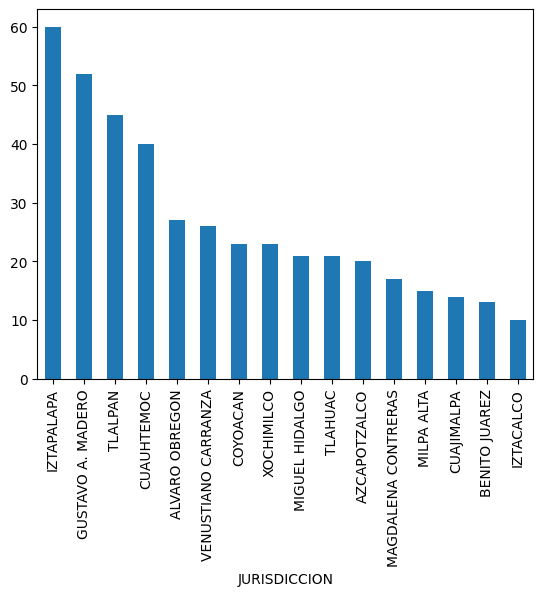

In [28]:
recursos_2023['JURISDICCION'].value_counts().plot(kind='bar')


observamos que iztapalapa es la alcaldia con mayor numero de centros de salud, seguido de la gustavo madero, tlalpan, cuauhtemoc e iztacalco es la entidad con menos centros clinicos.


<function matplotlib.pyplot.show(close=None, block=None)>

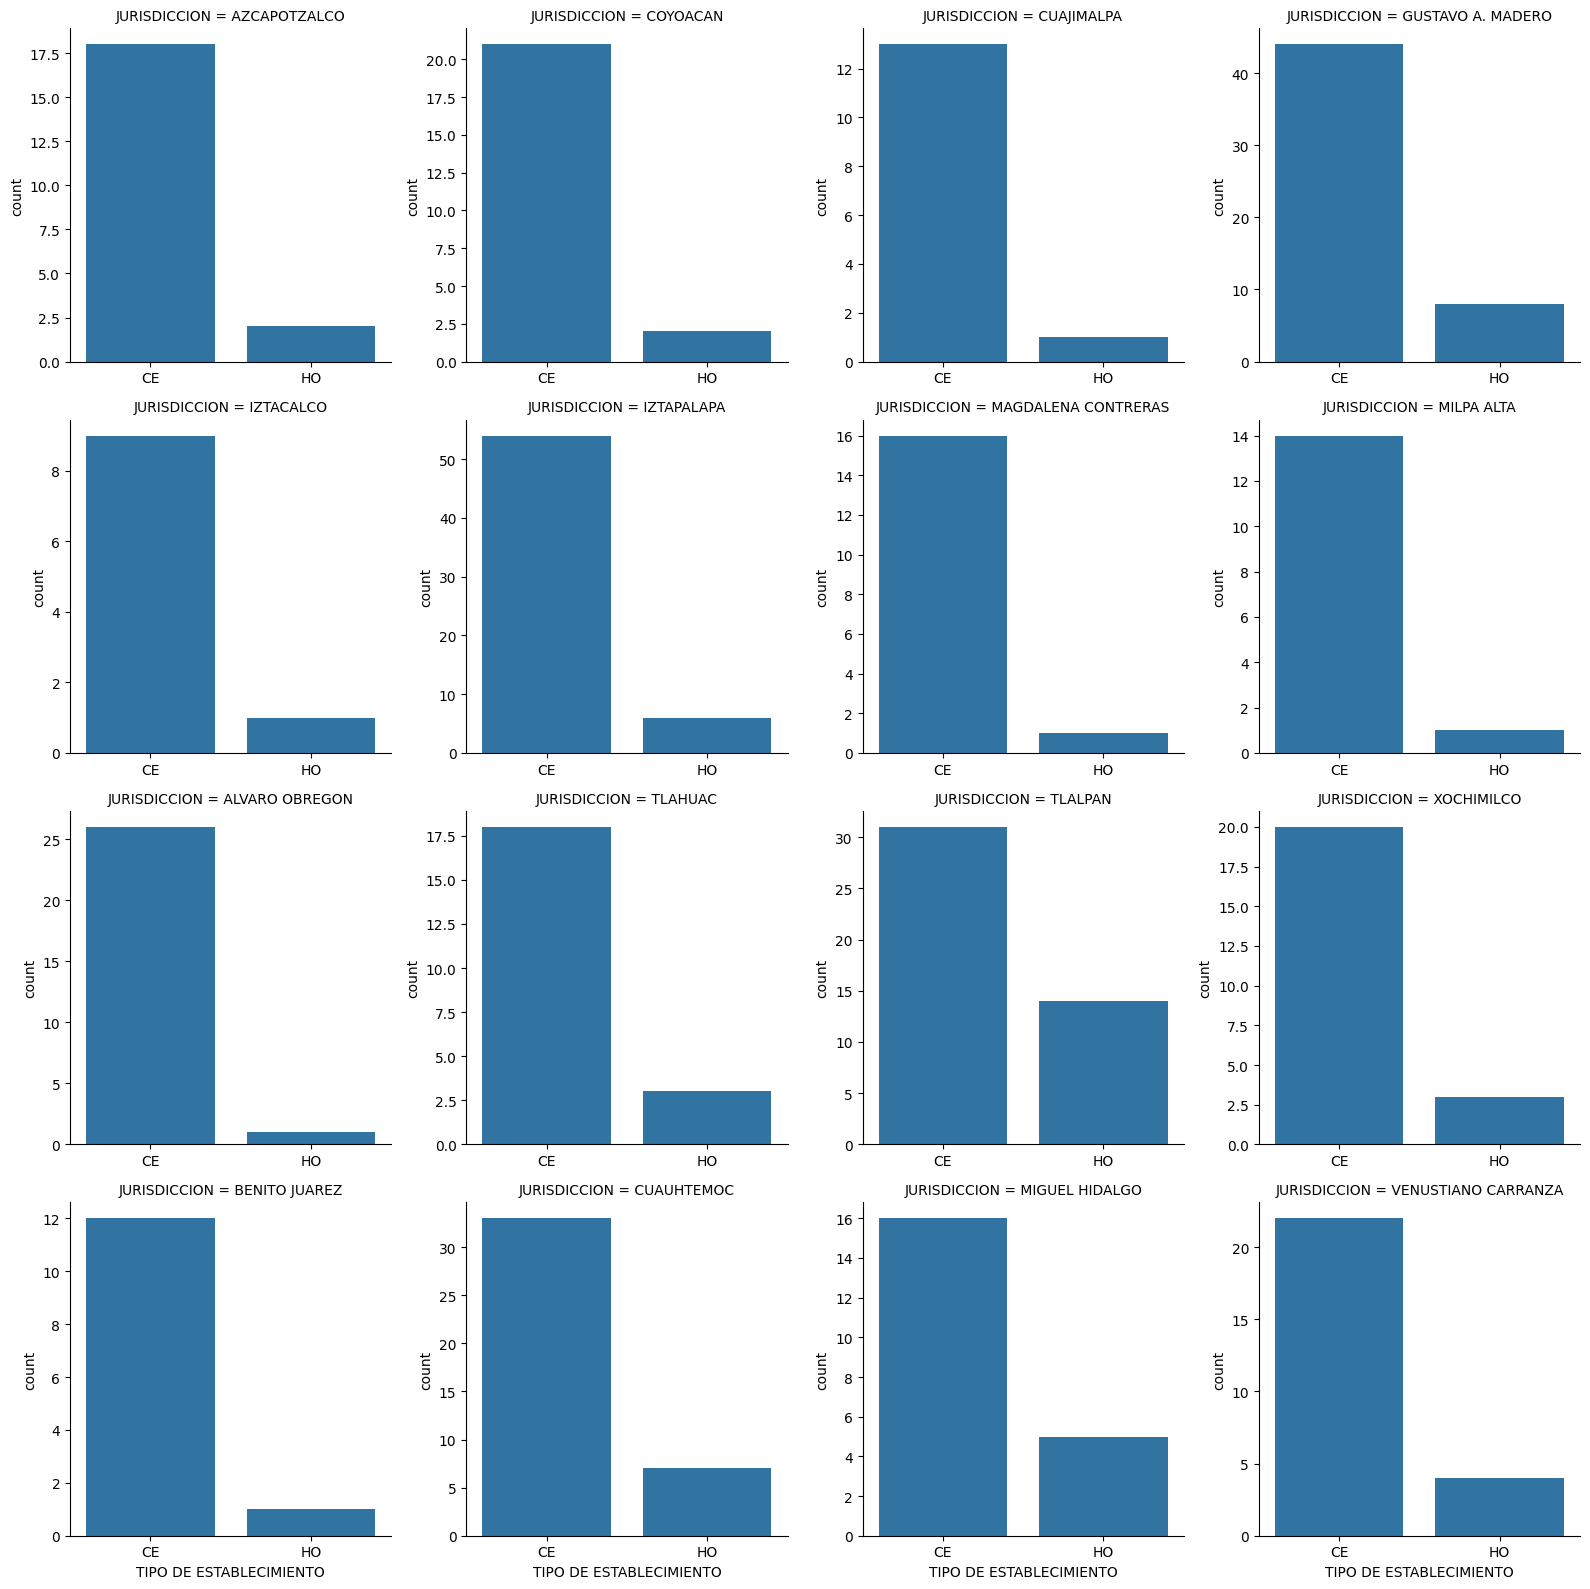

In [29]:
g = s.FacetGrid(recursos_2023, col="JURISDICCION",col_wrap=4, height=4,sharex=False,sharey=False)
g.map(s.countplot, "TIPO DE ESTABLECIMIENTO",order=recursos_2023['TIPO DE ESTABLECIMIENTO'].value_counts().index)

plt.show

notamos que solamente tenemos dos tipos de establecimiento en la CDMX. Hospitalizacion (HO) y consulta externa (CE)

In [30]:
recursos_2023['TIPOLOGIA'].unique()

array(['V', 'D', 'F', 'I', 'L', 'H', 'K', 'E', 'J', 'Q', 'S', 'G', 'T',
       'R', 'UNE', 'CES', 'P', 'O', 'M', 'Y', 'HM', 'N'], dtype=object)

Tambien entendemos los tipos de valores que tiene 'TIPOLOGIA', donde cada letra o grupo de letras representa un nivel de atencion para cada unidad de 'CE' y para 'HO'

<Axes: xlabel='TIPOLOGIA', ylabel='count'>

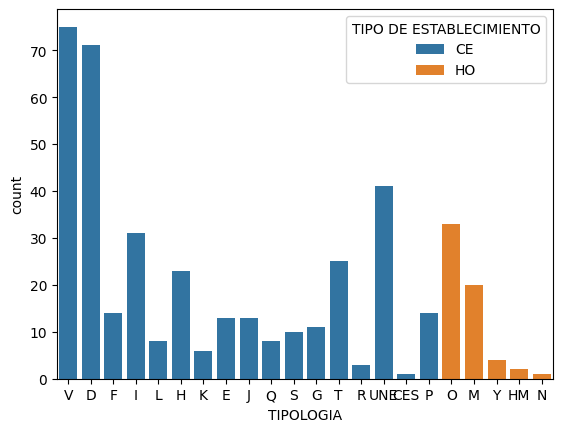

In [31]:
s.countplot(data=recursos_2023, x='TIPOLOGIA', hue='TIPO DE ESTABLECIMIENTO')



En el grafico de arriba se muestra la distribucion de los datos categoricos del TIPO DE ESTABLECIMIENTO y el conteo de cada una de ellas. Sin embargo
conviene hacer un analisis mas profundo para el tratado de nuestros datos:

* CONSULTA EXTERNA (CE):
1. V = unidad ministerio publico
2. D = urbano 1 nucleo basico (NB)
3. F = urbano 3 NB
4. I = urbano 7 NB
5. L = urbano 9 NB
6. H = urbano 5 NB
7. K = urbano 8 NB
8. E = urbano 2 NB
9. J = urbano 7 NB
10. Q = urbano 10 NB
11. S = urbano 12 NB
12. G = urbano 4 NB
13.  T = clinica de especialidades
14. R = urbano 11 NB
15. UNE = Unidades de especialidades Medicas
16. CES = centro de salud con servicios ampliados
17. P = unidad movil

* HOSPITALIZACION (HO)
1. O = hospital especializado
2. M = hospital general
3. Y = hospital psquiatrico
4. HM = no aparecido en la base de codigos
5. N = hospital integral
*significado dados en la base de codigos


In [32]:
#grupo-codigo es una variable para filtrar ciertas instituciones con igual TIPOLOGIA
grupo_codigo = recursos_2023[recursos_2023['TIPOLOGIA'] == 'V']
total_grupo = len(grupo_codigo)
total_grupo

75

In [33]:
nombres_clinicas = grupo_codigo['NOMBRE DEL ESTABLECIMIENTO'].unique()
print("Nombres de unidades psiquiátricas:")
for nombre in nombres_clinicas:
    print(nombre)


Nombres de unidades psiquiátricas:
CONSULTORIO MEDICO LEGAL DE LA COORDINACION TERRITORIAL AZC- 2,3,4
CONSULTORIO MEDICO LEGAL DE LA COORDINACION TERRITORIAL COY- 1,2
CONSULTORIO MEDICO LEGAL DE LA COORDINACION TERRITORIAL COY- 5
CONSULTORIO MEDICO LEGAL DE LA COORDINACION TERRITORIAL COY- 4
CONSULTORIO MEDICO LEGAL DE LA COORDINACION TERRITORIAL GAM 7,8
CONSULTORIO MEDICO LEGAL DE LA COORDINACION TERRITORIAL GAM- 2,4
CONSULTORIO MEDICO LEGAL DE LA COORDINACION TERRITORIAL IZP- 1,4
CONSULTORIO MEDICO LEGAL DE LA COORDINACION TERRITORIAL IZP- 5,8
CONSULTORIO MEDICO LEGAL DE LA COORDINACION TERRITORIAL IZP- 6
CONSULTORIO MEDICO LEGAL DE LA COORDINACION TERRITORIAL IZP- 3
CONSULTORIO MEDICO LEGAL DE LA COORDINACION TERRITORIAL IZP- 9,10
CONSULTORIO MEDICO LEGAL DE LA COORDINACION TERRITORIAL MAC- 2
CONSULTORIO MEDICO LEGAL DE LA COORDINACION TERRITORIAL MLP- 1
CONSULTORIO MEDICO LEGAL DE LA COORDINACION TERRITORIAL AOB- 3,4
CONSULTORIO MEDICO LEGAL DE LA COORDINACION TERRITORIAL AOB- 1
CO

Notemos algo muy relevante. A partir del grafico de TIPOLOGIA por TIPO DE ESTABLECIMIENTO, y al variar las busquedas para cada grupo con misma tipologia, observamos que tenemos clinicas u hospitales que solo pertenecen a la secretaria de salud (SSA). Que implica esto? No tenemos datos sobre hospitales y clinicas del IMSS, IMSSTE, Hospitales de otras instituciones, hospitales y clinicas privadas. Es asi, que no se podria modelar el riesgo de colapso hospitalario real. Durante una emergencia sanitaria, las demas instituciones no listadas en la base atienden a gran parte de la poblacion de la CDMX. Se planeaba utilizar la poblacion total por alcaldia, sin embargo debido a la suposicion anterior, utilizarla puede sobredimensionar la presion real de estos establecimientos. Ademas, el acceso a bases del IMSS, IMSSTE e instituciones privadas son complicadas.

Es asi como se propone cambiar el enfoque, conservando los objetivos. Al querer modelar el riesgo de colapso hospitalario, unicamente contaremos a las instituciones hospitalarias (HO) que tenemos disponibles en la base. Para reducir ruido, descartaremos hospitales psquiatricos y algunos de especialidades. Por otro lado, se analizara (sujeto a tiempo) los Centros de Salud de tipo (CE) eliminando establecimientos con tipologias que no brindan atencion al publico en general o brindan servicios muy particulares.
(TIPOLOGIA: P,V,UNE,T)

In [34]:
recursos_2023[['LOCALIDAD', 'JURISDICCION']].drop_duplicates()


,LOCALIDAD,JURISDICCION
44968,AZCAPOTZALCO,AZCAPOTZALCO
44983,COYOACAN,COYOACAN
44998,CUAJIMALPA DE MORELOS,CUAJIMALPA
45002,SAN LORENZO ACOPILCO,CUAJIMALPA
45008,GUSTAVO A. MADERO,GUSTAVO A. MADERO
45040,IZTACALCO,IZTACALCO
45045,IZTAPALAPA,IZTAPALAPA
45071,LA MAGDALENA CONTRERAS,MAGDALENA CONTRERAS
45080,VILLA MILPA ALTA,MILPA ALTA
45083,SAN BARTOLOME XICOMULCO,MILPA ALTA


In [35]:
recursos_2023[['LOCALIDAD', 'JURISDICCION']].value_counts()


,,count
LOCALIDAD,JURISDICCION,
IZTAPALAPA,IZTAPALAPA,60
GUSTAVO A. MADERO,GUSTAVO A. MADERO,52
TLALPAN,TLALPAN,42
CUAUHTEMOC,CUAUHTEMOC,40
ALVARO OBREGON,ALVARO OBREGON,27
VENUSTIANO CARRANZA,VENUSTIANO CARRANZA,26
XOCHIMILCO,XOCHIMILCO,23
COYOACAN,COYOACAN,23
MIGUEL HIDALGO,MIGUEL HIDALGO,21


haciendo estas dos ultimas lineas de codigo, nos dimos cuenta que identificamos a que alcaldia pertenecen las colonias listadas en 'LOCALIDAD' y sumando sus datos en donde pertenecen, el numero de valores para ambas varibales son las mismas. Esto quiere decir que en 'LOCALIDAD' tenemos mayor nivel de granularidad y desconocemos porque al crear la base de datos se manejo de esta manera, quiza se de por diferencias del pueblo con el centro urbano de la alcaldia. Esto podria ser IMPORTANTE en el modelo, sin embargo puede que no aporte algun valor y generar mas ruido. Optaremos por eliminar esta variable y quedarnos con 'JURISDICCION' como unica variable geografica

In [36]:
recursos_2023 = recursos_2023.drop('LOCALIDAD', axis=1)
recursos_2023 = recursos_2023.drop('CLAVE.LOCALIDAD', axis=1)

Eliminaremos las tipologias que no seran de interes al modelo y crean ruido y sesgo.

In [37]:
recursos_2023 = recursos_2023[~recursos_2023['TIPOLOGIA'].isin(['P', 'V', 'UNE', 'T','Y','HM'])]


In [38]:
recursos_2023.shape

(266, 147)

Ahora contamos con 266 datos. antes de pasar al EDA de datos numericos, haremos la union de las bases de urgencias y egresos con recursos a traves de la variable 'CLUES' la idea es mapear el total de visitantes anuales que recibio cierta institucion para que pueda ser parte del umbral para definir el colapso hospitalario

In [39]:
egresos = pd.read_csv("/content/drive/MyDrive/ICD/egresos_cdmx.csv")
urgencias = pd.read_csv("/content/drive/MyDrive/ICD/urgencias_cdmx.csv")

In [40]:
print(egresos.shape)
print(urgencias.shape)

(228731, 15)
(830724, 12)


Lo que haremos es realizar un conteo de la variable 'CLUES' en cada base de urgencia y egresos y mediante esta variable unirla a la base de recursos para obtener la afluencia anula que se tuvo en cada institucion.

In [41]:
egresos_totales = egresos.groupby("CLUES").size().reset_index(name="afluencia total hospitalizacion")
urgencias_totales = urgencias.groupby("CLUES").size().reset_index(name="afluencia total urgencias")


In [42]:
recursos_2023 = recursos_2023.merge(egresos_totales, on="CLUES", how="left")
recursos_2023 = recursos_2023.merge(urgencias_totales, on="CLUES", how="left")


In [43]:
#imputacion de datos faltantes
recursos_2023['afluencia total urgencias'].fillna(recursos_2023['afluencia total urgencias'].median(), inplace=True)
recursos_2023['afluencia total hospitalizacion'].fillna(recursos_2023['afluencia total hospitalizacion'].median(), inplace=True)

<ipython-input-43-3920309574>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  recursos_2023['afluencia total urgencias'].fillna(recursos_2023['afluencia total urgencias'].median(), inplace=True)
<ipython-input-43-3920309574>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

EDA Y PREPROCESAMIENTO (NUMERICOS)
---



ahora empezaremos con el tratamiento de los datos numericos, aqui abarca las variables de tipo numerica, donde se encuentra el conteo de los recursos de cada establecimiento.

In [44]:
recursos_2023.describe()


,CLAVE.ENTIDAD,CLAVE.JURISDICCIÓN,UNIDADES,E13,C1301,C1302,C1303,C1304,C1305,C1306,...,C1749,C1730,Año,E18,X,X.1,X.2,X.3,afluencia total hospitalizacion,afluencia total urgencias
count,266.0,266.000000,266.0,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,266.000000,266.000000,266.0,266.000000,0.0,0.0,0.0,0.0,266.000000,266.000000
mean,9.0,7.631579,1.0,14.526316,3.808271,0.266917,0.413534,0.184211,0.466165,1.127820,...,0.048872,0.037594,2023.0,37.199248,NaN,NaN,NaN,NaN,2735.195489,14495.139098
std,0.0,4.544910,0.0,33.010822,3.646255,1.175294,2.067275,1.063944,2.376136,1.629509,...,0.277214,0.322865,0.0,81.228920,NaN,NaN,NaN,NaN,2628.332553,7481.383647
min,9.0,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2023.0,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000
25%,9.0,4.000000,1.0,2.250000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,2023.0,3.000000,NaN,NaN,NaN,NaN,2360.000000,14004.000000
50%,9.0,8.000000,1.0,7.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,2023.0,11.500000,NaN,NaN,NaN,NaN,2360.000000,14004.000000
75%,9.0,11.000000,1.0,13.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,2023.0,24.750000,NaN,NaN,NaN,NaN,2360.000000,14004.000000
max,9.0,16.000000,1.0,286.000000,22.000000,12.000000,28.000000,16.000000,32.000000,22.000000,...,2.000000,4.000000,2023.0,831.000000,NaN,NaN,NaN,NaN,37500.000000,85131.000000


para no hacer muy complicaddo el EDA y pre procesamiento, lo que haremos es agrupar por bloques tematicos, estos incluyen:
1. CONSULTORIOS:
- generales
- especializadades
- salud mental
- urgencias
2. CAMAS (E14 Y E15): usaremos dos criterios relevantes para determinar los grupos:
 2.1 externo o no externo en el area de hospitalizacion (estancias prolongadas)
 2.2 tipo o nivel de atencion que proporciona
- camas de hospitalizacion general
- camas criticas o de soporte vital (indefinido)
- camas transitorias y urgencias (corta estancia)
- camas neonatales y maternales
3. MEDICOS (E18)
- medicos generales
- medico urgenciolo
- medico especialista
- medico cirujano (general y especializado)

Los demas bloques tematicos no seran utlizados para el modelo.
*Se propone anadir la categoria de enfermeros ya que por tiempo, no se pudo anadir

In [45]:
#consultorios
recursos_2023['consultorios_generales'] = recursos_2023['C1301']
recursos_2023['consultorios_urgencias'] = recursos_2023['C1317']
recursos_2023['consultorios_mental'] = recursos_2023[['C1310', 'C1313']].sum(axis=1)
recursos_2023['consultorios_especializados'] = recursos_2023[['C1302','C1303','C1304','C1305','C1306','C1307','C1308','C1309','C1311','C1312','C1314','C1315','C1316','C1318','C1319','C1320','C1321']].sum(axis=1)


In [46]:
#camas
recursos_2023['camas_hospitalizacion'] = recursos_2023[['C1400','C1401','C1402','C1403','C1404','C1405','C1406','C1408']].sum(axis=1)

recursos_2023['camas_atencion_inmediata'] = recursos_2023[['C1501','C1502','C1508','C1506']].sum(axis=1)

recursos_2023['camas_criticas'] = recursos_2023[['C1505','C1509','C1504']].sum(axis=1)

recursos_2023['camas_neonatales'] = recursos_2023[['C1601','C1602']].sum(axis=1)

In [47]:
#medicos
recursos_2023['medicos_generales'] = recursos_2023['C1801']
recursos_2023['medicos_urgenciologos'] = recursos_2023['C1826']
recursos_2023['medicos_especialistas'] = recursos_2023[[
    'C1803', 'C1804', 'C1806', 'C1807', 'C1808', 'C1809',
    'C1810', 'C1812', 'C1815', 'C1816', 'C1817', 'C1818',
    'C1819', 'C1821', 'C1822', 'C1823', 'C1824', 'C1825']].sum(axis=1)
recursos_2023['medicos_cirujanos'] = recursos_2023[['C1805','C1811','C1820']].sum(axis=1)

In [48]:
#Al trabajar con instituciones hospitalarias 'HO' hacemos una division de la base. Por ahora nos centramos en el modelo de riesgo de colapso hospitalario.
recursos_ce = recursos_2023[recursos_2023["TIPO DE ESTABLECIMIENTO"] == "CE"]
recursos_ho = recursos_2023[recursos_2023["TIPO DE ESTABLECIMIENTO"] == "HO"]


CONSULTA EXTERNA (CE)
---



       consultorios_generales  consultorios_urgencias  consultorios_mental  \
count              212.000000                   212.0           212.000000   
mean                 4.382075                     0.0             0.561321   
std                  3.476428                     0.0             1.039966   
min                  0.000000                     0.0             0.000000   
25%                  1.000000                     0.0             0.000000   
50%                  4.000000                     0.0             0.000000   
75%                  6.000000                     0.0             1.000000   
max                 15.000000                     0.0             9.000000   

       consultorios_especializados  
count                   212.000000  
mean                      1.867925  
std                       2.312445  
min                       0.000000  
25%                       1.000000  
50%                       1.000000  
75%                       2.000000  
m

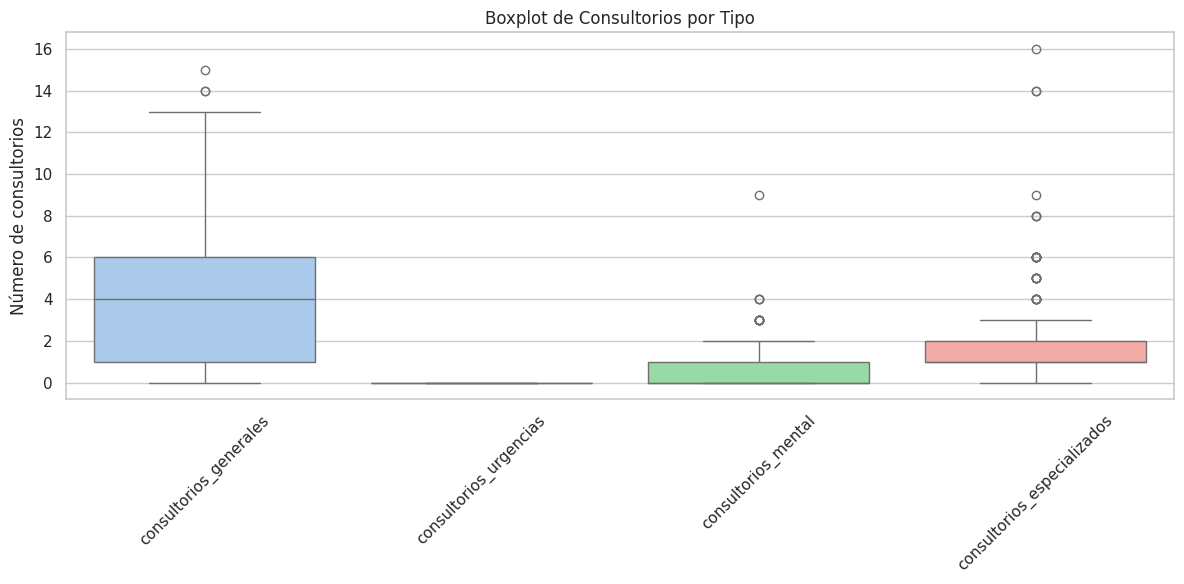

In [49]:

# dataframe con solo las columnas necesarias para el EDA
df_consultorios = recursos_ce[[
    'consultorios_generales', 'consultorios_urgencias',
    'consultorios_mental', 'consultorios_especializados'
]]

# Estadísticos descriptivos
print(df_consultorios.describe())

# Configuración general para gráficos
s.set(style="whitegrid", palette="pastel")

# grafica de bigotes
plt.figure(figsize=(12, 6))
s.boxplot(data=df_consultorios)
plt.title('Boxplot de Consultorios por Tipo')
plt.ylabel('Número de consultorios')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



       camas_hospitalizacion  camas_atencion_inmediata  camas_criticas  \
count                  212.0                212.000000           212.0   
mean                     0.0                  0.037736             0.0   
std                      0.0                  0.422687             0.0   
min                      0.0                  0.000000             0.0   
25%                      0.0                  0.000000             0.0   
50%                      0.0                  0.000000             0.0   
75%                      0.0                  0.000000             0.0   
max                      0.0                  6.000000             0.0   

       camas_neonatales  
count             212.0  
mean                0.0  
std                 0.0  
min                 0.0  
25%                 0.0  
50%                 0.0  
75%                 0.0  
max                 0.0  


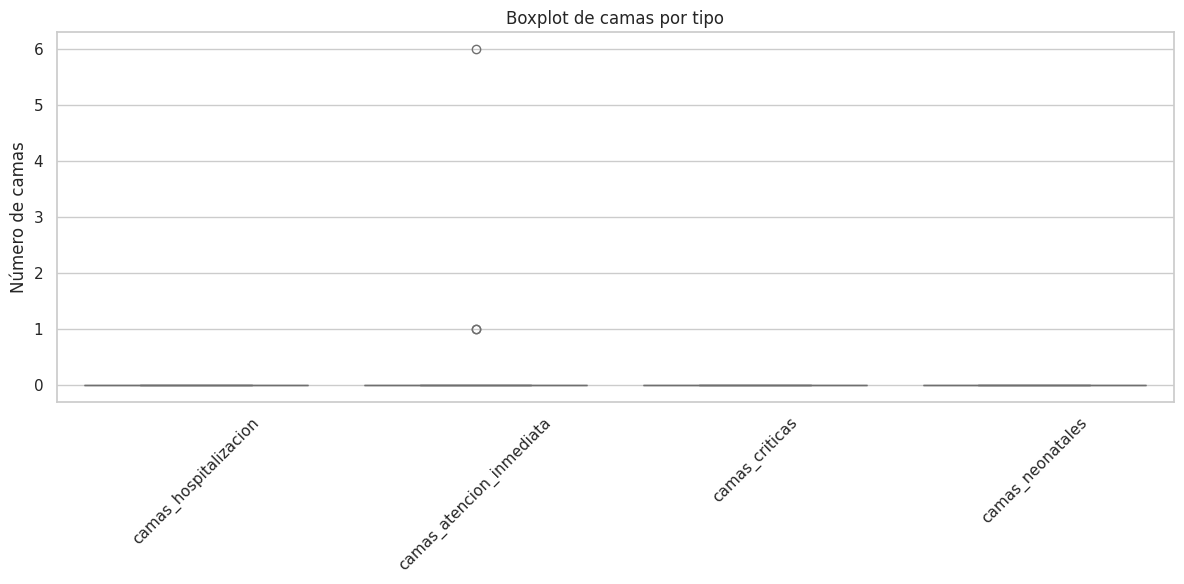

In [50]:
# dataframe con solo las columnas necesarias para el EDA
df_camas = recursos_ce[[
    'camas_hospitalizacion', 'camas_atencion_inmediata',
    'camas_criticas', 'camas_neonatales'
]]

# Estadísticos descriptivos
print(df_camas.describe())

# Configuración general para gráficos
s.set(style="whitegrid", palette="pastel")

# grafica de bigotes
plt.figure(figsize=(12, 6))
s.boxplot(data=df_camas)
plt.title('Boxplot de camas por tipo')
plt.ylabel('Número de camas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


       medicos_generales  medicos_urgenciologos  medicos_especialistas  \
count         212.000000                  212.0             212.000000   
mean            6.877358                    0.0               0.561321   
std             6.394907                    0.0               1.460706   
min             0.000000                    0.0               0.000000   
25%             2.000000                    0.0               0.000000   
50%             5.000000                    0.0               0.000000   
75%            10.250000                    0.0               0.000000   
max            36.000000                    0.0              11.000000   

       medicos_cirujanos  
count         212.000000  
mean            0.047170  
std             0.271282  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             0.000000  
max             3.000000  


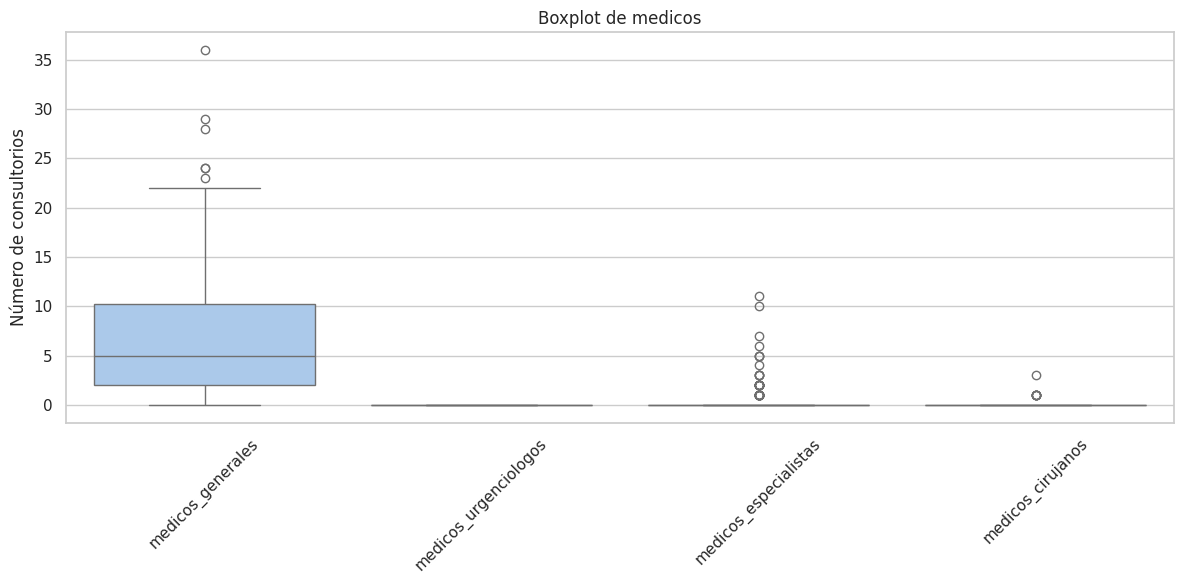

In [51]:
# dataframe con solo las columnas necesarias para el EDA
df_medicos = recursos_ce[[
    'medicos_generales', 'medicos_urgenciologos',
    'medicos_especialistas', 'medicos_cirujanos'
]]

# Estadísticos descriptivos
print(df_medicos.describe())

# Configuración general para gráficos
s.set(style="whitegrid", palette="pastel")

# grafica de bigotes
plt.figure(figsize=(12, 6))
s.boxplot(data=df_medicos)
plt.title('Boxplot de medicos')
plt.ylabel('Número de consultorios')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


UNIDADES DE HOSPITALIZACION (HO)
---


---



CONSULTORIOS
---



In [52]:
# dataframe con solo las columnas necesarias para el EDA de las variables para consultorios
df_consultorios = recursos_ho[[
    'consultorios_generales', 'consultorios_urgencias',
    'consultorios_mental', 'consultorios_especializados'
]]


In [53]:
#tratado de datos nulos y faltantes
df_consultorios.isnull().mean().sort_values(ascending=False)


,0
consultorios_generales,0.0
consultorios_urgencias,0.0
consultorios_mental,0.0
consultorios_especializados,0.0


       consultorios_generales  consultorios_urgencias  consultorios_mental  \
count               54.000000               54.000000            54.000000   
mean                 1.555556                3.703704             3.259259   
std                  3.445898                4.240993             4.751108   
min                  0.000000                0.000000             0.000000   
25%                  0.000000                2.000000             1.000000   
50%                  0.000000                3.000000             2.000000   
75%                  2.000000                4.000000             3.000000   
max                 22.000000               29.000000            30.000000   

       consultorios_especializados  
count                    54.000000  
mean                     36.296296  
std                      56.403743  
min                       0.000000  
25%                       8.250000  
50%                      15.500000  
75%                      27.000000  
m

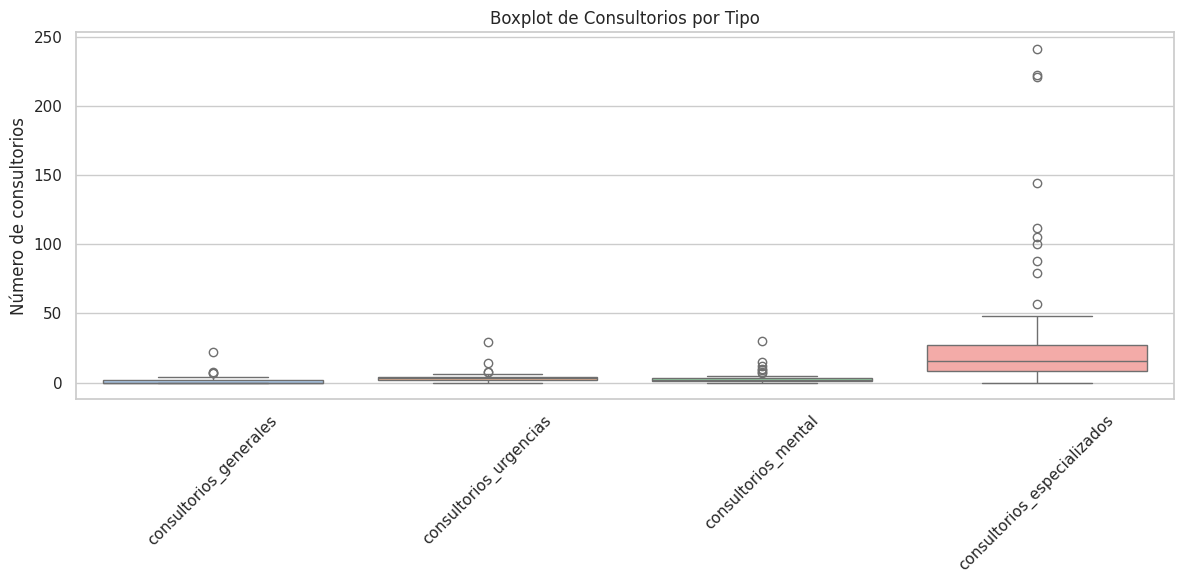

In [54]:

# Estadísticos descriptivos
print(df_consultorios.describe())

# Configuración general para gráficos
s.set(style="whitegrid", palette="pastel")

# grafica de bigotes
plt.figure(figsize=(12, 6))
s.boxplot(data=df_consultorios)
plt.title('Boxplot de Consultorios por Tipo')
plt.ylabel('Número de consultorios')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


observamos que tenemos una media de 1.55 colsultorios generales con desv de 3.44. para consultorios de urgencias tenemos una media de 3.7 con desv de 4.2 y para consultorios de tipo mentales tenemos media de 3.25 con desv de 4.75. Para los especializados tenemos una media de 36.3 con desv de 56.4

In [55]:
# Diccionario con umbrales superiores calculados manualmente
umbrales_superiores = {
    'consultorios_generales': 5,
    'consultorios_urgencias': 7,
    'consultorios_mental': 6,
    'consultorios_especializados': 55.13
}

#recorremos cada variable para determinar cuales superan el umbral (RANGO INTERQUARTIL)
for var, umbral in umbrales_superiores.items():
    print(f'Hospitales con {var.replace("_", " ")} mayores a {umbral:.2f}:')
    outliers = recursos_ho[recursos_ho[var] > umbral]
    if not outliers.empty:
        print(outliers[['CLUES', 'NOMBRE DEL ESTABLECIMIENTO', var]].to_string(index=False))
    else:
        print("Ningún hospital supera el umbral.")

Hospitales con consultorios generales mayores a 5.00:
      CLUES                              NOMBRE DEL ESTABLECIMIENTO  consultorios_generales
DFSSA001535 UNIDAD MEDICA DEL RECLUSORIO PREVENTIVO VARONIL ORIENTE                     7.0
DFSSA003372                          HOSPITAL PEDIATRICO PERALVILLO                     8.0
DFSSA003973        HOSPITAL GENERAL DE MEXICO DR. EDUARDO LICEAGA                    22.0
DFSSA003990                           HOSPITAL NACIONAL HOMEOPATICO                     7.0
Hospitales con consultorios urgencias mayores a 7.00:
      CLUES                                          NOMBRE DEL ESTABLECIMIENTO  consultorios_urgencias
DFSSA003973                    HOSPITAL GENERAL DE MEXICO DR. EDUARDO LICEAGA                    14.0
DFSSA004031                    INSTITUTO NACIONAL DE CARDIOLOGIA IGNACIO CHAVEZ                     8.0
DFSSA004055 INSTITUTO NACIONAL DE CIENCIAS MEDICAS Y NUTRICION SALVADOR ZUBIRAN                    29.0
DFSSA004096    I

observamos que presentamos datos atipicos, mayormente en consultorios especializados, haciendo una investigacion teorica, esto releja la capacidad real de cada hospital y que efectivamente tenemos hospitales con alta infrestructura interna

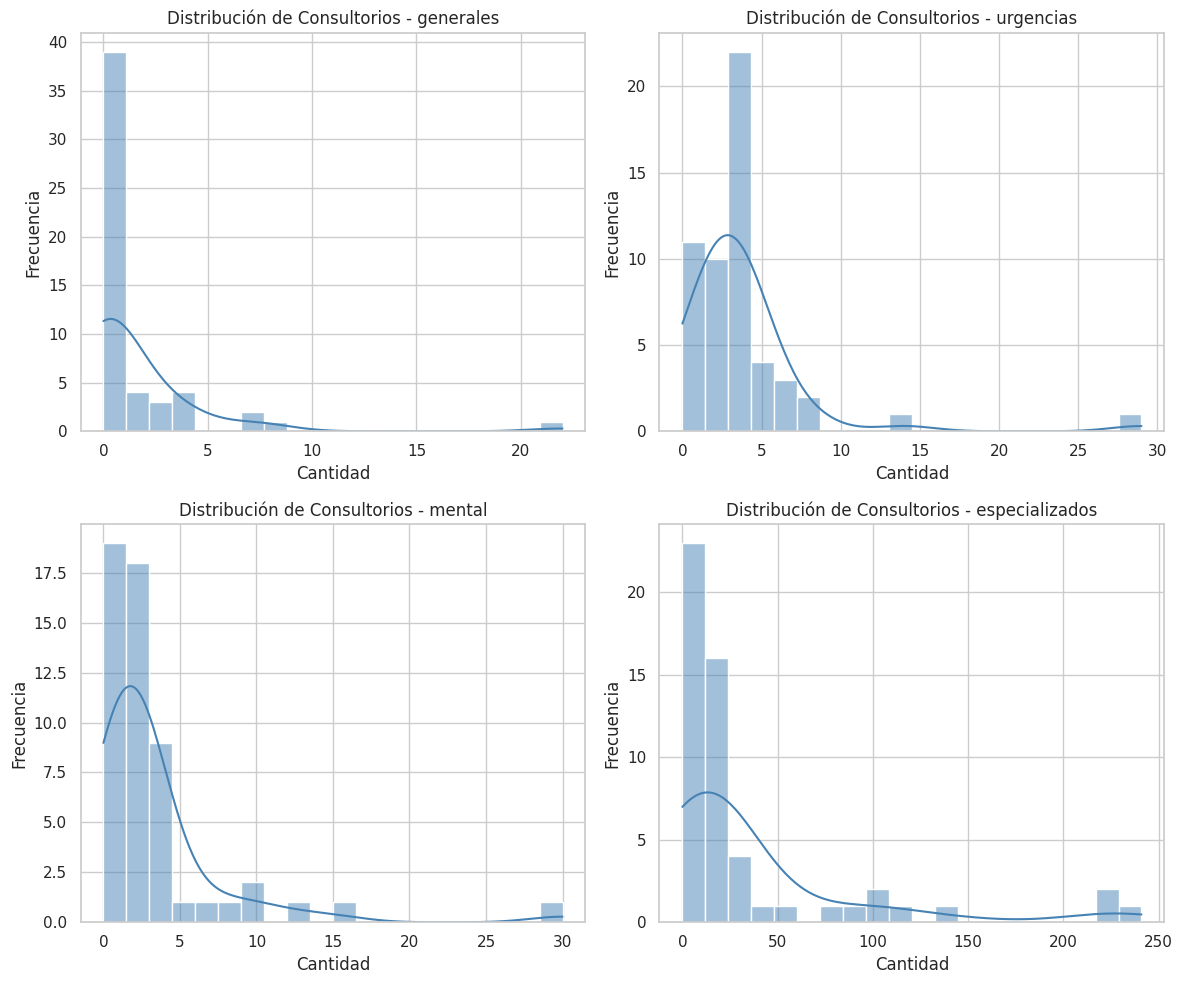

In [56]:
#pruebas estadisticas para validad supuestos de distribucion, etc.

# Configuración estética
s.set(style="whitegrid")
plt.figure(figsize=(12, 10))

# Lista de variables y títulos
variables = ['consultorios_generales', 'consultorios_urgencias',
             'consultorios_mental', 'consultorios_especializados']
titulos = ['generales', 'urgencias', 'mental', 'especializados']

# histrogramas para verificar distribucion
for i, var in enumerate(variables):
    plt.subplot(2, 2, i + 1)
    s.histplot(df_consultorios[var], kde=True, bins=20, color='steelblue')
    plt.title(f'Distribución de Consultorios - {titulos[i]}')
    plt.xlabel('Cantidad')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [57]:
from scipy.stats import shapiro, skew, normaltest


x = df_consultorios["consultorios_urgencias"].dropna()

# 1. Prueba de Shapiro-Wilk
stat_shapiro, p_shapiro = shapiro(x)
print(f"Shapiro-Wilk: Estadístico = {stat_shapiro:.4f}, p-valor = {p_shapiro:.4f}")

# 2. Asimetría de Fisher
skewness = skew(x)
print(f"Asimetría (skewness) = {skewness:.4f}")
if skewness > 0:
    print("Distribución sesgada a la derecha.")
elif skewness < 0:
    print("Distribución sesgada a la izquierda.")
else:
    print("Distribución simétrica.")


Shapiro-Wilk: Estadístico = 0.5747, p-valor = 0.0000
Asimetría (skewness) = 4.2587
Distribución sesgada a la derecha.


Las pruebas estadisticas nos dictan que no siguen una distribucion normal y es asimetrica sesgada a la derecha

In [58]:
# repetimos el proceso para las demas variables agrupadas
x = df_consultorios["consultorios_generales"].dropna()

# 1. Prueba de Shapiro-Wilk
stat_shapiro, p_shapiro = shapiro(x)
print(f"Shapiro-Wilk: Estadístico = {stat_shapiro:.4f}, p-valor = {p_shapiro:.4f}")

# 2. Asimetría de Fisher
skewness = skew(x)
print(f"Asimetría (skewness) = {skewness:.4f}")
if skewness > 0:
    print("Distribución sesgada a la derecha.")
elif skewness < 0:
    print("Distribución sesgada a la izquierda.")
else:
    print("Distribución simétrica.")

Shapiro-Wilk: Estadístico = 0.4911, p-valor = 0.0000
Asimetría (skewness) = 4.2272
Distribución sesgada a la derecha.


Haciendo el preprocesamiento de las grupos de consultorios concluimos que los valores atipicos representan los hospitales con mas capacidad real que realmente tienen mas recursos que el promedio, eliminarlos o imputarlos o cualquier tratamiento podria crear resultados erroneos. Ademas, como el objetivo es evaluar el riesgo de colapso individualmente, no afectara el resultado de otras instituciones. Basicamente su alta capacidad esta documentada y esperada. Sin embargo, consideraremos mas adelante realizar transformaciones mas convenientes dependiendo otros factores como la distribucion de los datos. Este mismo proceso se repite para las variables agrupadas de camas y personal medico

CAMAS
---



In [59]:

df_camas = recursos_ho[[
    'camas_hospitalizacion', 'camas_atencion_inmediata',
    'camas_criticas', 'camas_neonatales'
]]

In [60]:

df_camas.isnull().mean().sort_values(ascending=False)


,0
camas_hospitalizacion,0.0
camas_atencion_inmediata,0.0
camas_criticas,0.0
camas_neonatales,0.0


       camas_hospitalizacion  camas_atencion_inmediata  camas_criticas  \
count              54.000000                 54.000000       54.000000   
mean              103.407407                 20.925926       18.462963   
std               121.506971                 29.565949       32.613640   
min                 0.000000                  0.000000        0.000000   
25%                42.250000                  7.250000        4.500000   
50%                63.000000                 13.500000       11.500000   
75%               130.500000                 24.000000       22.500000   
max               783.000000                209.000000      236.000000   

       camas_neonatales  
count         54.000000  
mean          16.148148  
std           28.280540  
min            0.000000  
25%            0.000000  
50%            8.000000  
75%           18.750000  
max          139.000000  


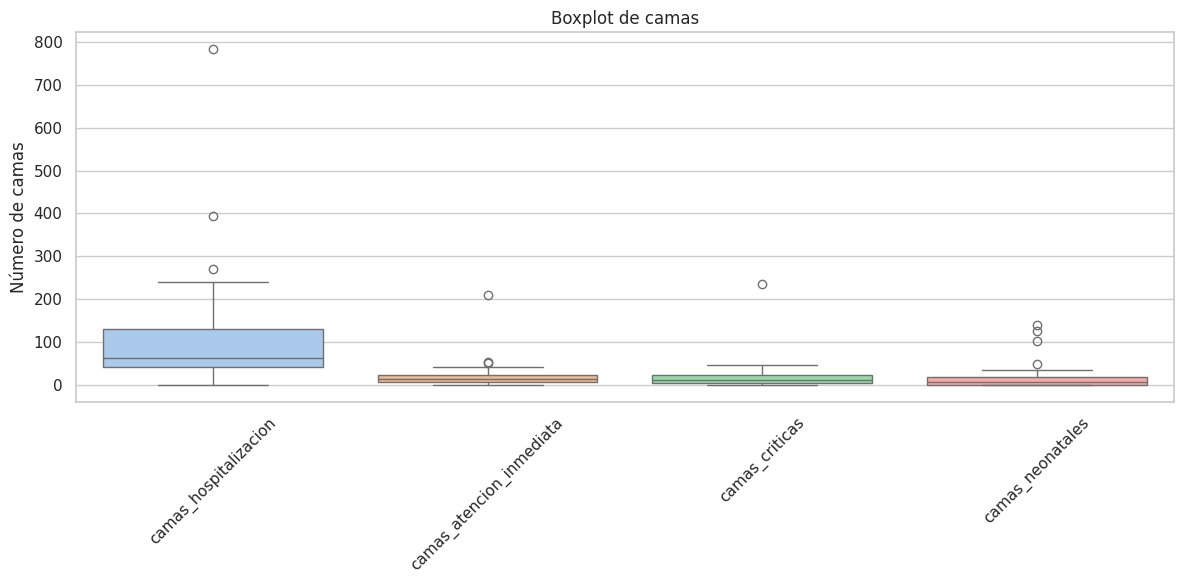

In [61]:

# Estadísticos descriptivos
print(df_camas.describe())


s.set(style="whitegrid", palette="pastel")


plt.figure(figsize=(12, 6))
s.boxplot(data=df_camas)
plt.title('Boxplot de camas')
plt.ylabel('Número de camas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [62]:
# Diccionario con umbrales superiores calculados manualmente
umbrales_superiores = {
    'camas_hospitalizacion': 262.875,
    'camas_atencion_inmediata': 78.875,
    'camas_criticas': 30.0,
    'camas_neonatales': 46.875
}

# Recorrer cada variable y mostrar los hospitales que exceden el umbral
for var, umbral in umbrales_superiores.items():
    print(f'Hospitales con {var.replace("_", " ")} mayores a {umbral:.2f}:')
    outliers = recursos_ho[recursos_ho[var] > umbral]
    if not outliers.empty:
        print(outliers[['CLUES', 'NOMBRE DEL ESTABLECIMIENTO', var]].to_string(index=False))
    else:
        print("Ningún hospital supera el umbral.")


Hospitales con camas hospitalizacion mayores a 262.88:
      CLUES                       NOMBRE DEL ESTABLECIMIENTO  camas_hospitalizacion
DFSSA003944                        HOSPITAL JUAREZ DE MEXICO                  395.0
DFSSA003973 HOSPITAL GENERAL DE MEXICO DR. EDUARDO LICEAGA                  783.0
DFSSA004014                  INSTITUTO NACIONAL DE PEDIATRIA                  271.0
Hospitales con camas atencion inmediata mayores a 78.88:
      CLUES                       NOMBRE DEL ESTABLECIMIENTO  camas_atencion_inmediata
DFSSA003973 HOSPITAL GENERAL DE MEXICO DR. EDUARDO LICEAGA                     209.0
Hospitales con camas criticas mayores a 30.00:
      CLUES                                             NOMBRE DEL ESTABLECIMIENTO  camas_criticas
DFSSA003944                                              HOSPITAL JUAREZ DE MEXICO            36.0
DFSSA003973                       HOSPITAL GENERAL DE MEXICO DR. EDUARDO LICEAGA           236.0
DFSSA004002                       

Aqui sucede el mismo caso con los atipicos.


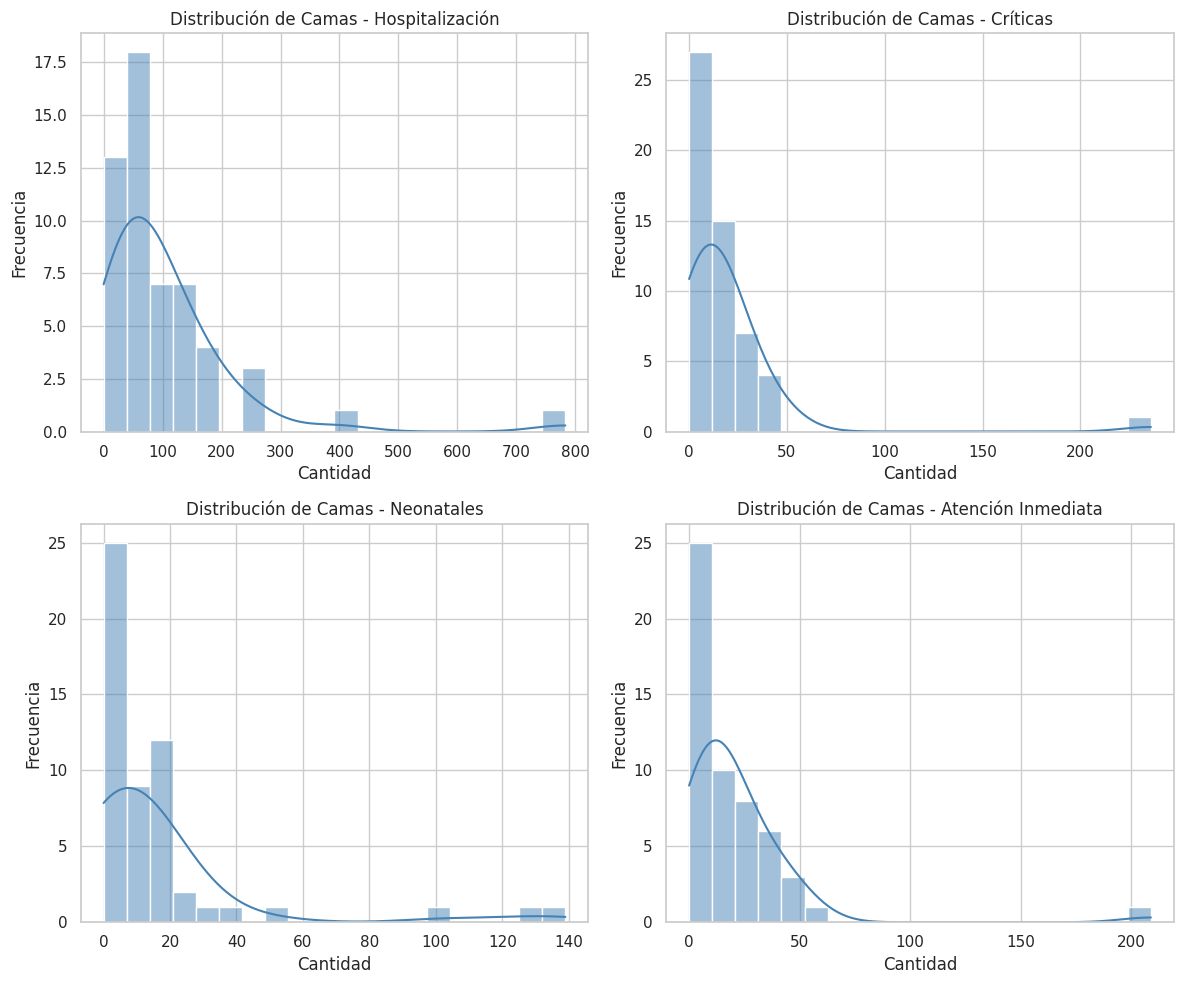

In [63]:
#pruebas estadisticas para validad supuestos de distribucion, etc.


s.set(style="whitegrid")
plt.figure(figsize=(12, 10))


variables = ['camas_hospitalizacion', 'camas_criticas',
             'camas_neonatales', 'camas_atencion_inmediata']
titulos = ['Hospitalización', 'Críticas', 'Neonatales', 'Atención Inmediata']


for i, var in enumerate(variables):
    plt.subplot(2, 2, i + 1)
    s.histplot(df_camas[var], kde=True, bins=20, color='steelblue')
    plt.title(f'Distribución de Camas - {titulos[i]}')
    plt.xlabel('Cantidad')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


In [64]:
from scipy.stats import shapiro, skew, normaltest



x = df_camas["camas_criticas"].dropna()


stat_shapiro, p_shapiro = shapiro(x)
print(f"Shapiro-Wilk: Estadístico = {stat_shapiro:.4f}, p-valor = {p_shapiro:.4f}")


skewness = skew(x)
print(f"Asimetría (skewness) = {skewness:.4f}")
if skewness > 0:
    print("Distribución sesgada a la derecha.")
elif skewness < 0:
    print("Distribución sesgada a la izquierda.")
else:
    print("Distribución simétrica.")


Shapiro-Wilk: Estadístico = 0.4262, p-valor = 0.0000
Asimetría (skewness) = 5.6507
Distribución sesgada a la derecha.


In [65]:

x = df_camas["camas_atencion_inmediata"].dropna()


stat_shapiro, p_shapiro = shapiro(x)
print(f"Shapiro-Wilk: Estadístico = {stat_shapiro:.4f}, p-valor = {p_shapiro:.4f}")


skewness = skew(x)
print(f"Asimetría (skewness) = {skewness:.4f}")
if skewness > 0:
    print("Distribución sesgada a la derecha.")
elif skewness < 0:
    print("Distribución sesgada a la izquierda.")
else:
    print("Distribución simétrica.")

Shapiro-Wilk: Estadístico = 0.5135, p-valor = 0.0000
Asimetría (skewness) = 4.9197
Distribución sesgada a la derecha.


Las pruebas estadisticas utilizadas se utilizaron para verificar la normalidad de los datos y la simetria. Se considero utilizar Shapiro Wels y la prueba de asimetria de Fisher por la cantidad de datos. Todas las pruebas relevaron que no provienen de una distribucion normal y son asimetricas positivas, sesgadas a la derecha. Esto se considera para desicir utilizar transformaciones a las variables para el modelado.

PERSONAL MEDICO Y DE ENFERMERIA
---



In [66]:

df_medicos = recursos_ho[[
    'medicos_generales', 'medicos_urgenciologos',
    'medicos_especialistas', 'medicos_cirujanos'
]]

In [67]:

df_medicos.isnull().mean().sort_values(ascending=False)

,0
medicos_generales,0.0
medicos_urgenciologos,0.0
medicos_especialistas,0.0
medicos_cirujanos,0.0


       medicos_generales  medicos_urgenciologos  medicos_especialistas  \
count          54.000000              54.000000              54.000000   
mean           26.444444               5.518519              78.407407   
std            23.234381               8.404268              90.852673   
min             0.000000               0.000000               0.000000   
25%            11.000000               0.000000              28.250000   
50%            20.000000               1.000000              48.000000   
75%            35.750000              10.000000              99.000000   
max           123.000000              31.000000             534.000000   

       medicos_cirujanos  
count          54.000000  
mean           27.722222  
std            30.850471  
min             0.000000  
25%             8.500000  
50%            18.000000  
75%            37.750000  
max           182.000000  


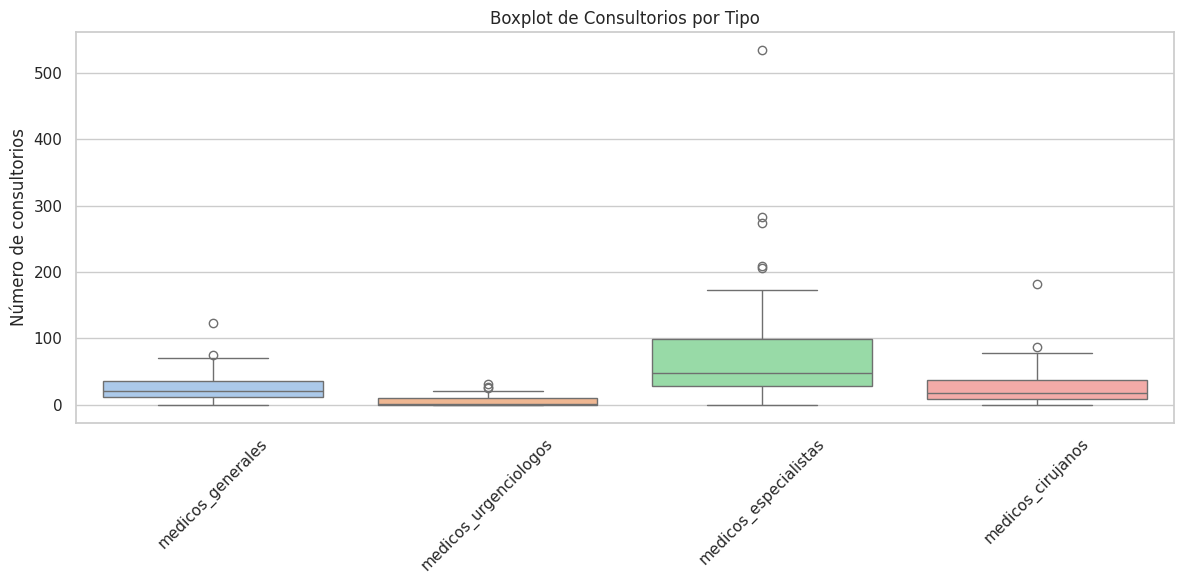

In [68]:

print(df_medicos.describe())

s.set(style="whitegrid", palette="pastel")


plt.figure(figsize=(12, 6))
s.boxplot(data=df_medicos)
plt.title('Boxplot de Consultorios por Tipo')
plt.ylabel('Número de consultorios')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [69]:

umbrales_superiores = {
    'medicos_generales': 73.88,
    'medicos_urgenciologos': 25,
    'medicos_especialistas': 205.13,
    'medicos_cirujanos': 81.63
}


for var, umbral in umbrales_superiores.items():
    print(f'Hospitales con {var.replace("_", " ")} mayores a {umbral:.2f}:')
    outliers = recursos_ho[recursos_ho[var] > umbral]
    if not outliers.empty:
        print(outliers[['CLUES', 'NOMBRE DEL ESTABLECIMIENTO', var]].to_string(index=False))
    else:
        print("Ningún hospital supera el umbral.")

Hospitales con medicos generales mayores a 73.88:
      CLUES    NOMBRE DEL ESTABLECIMIENTO  medicos_generales
DFSSA003722     HOSPITAL GENERAL BALBUENA               75.0
DFSSA018166 HOSPITAL GENERAL AJUSCO MEDIO              123.0
Hospitales con medicos urgenciologos mayores a 25.00:
      CLUES                 NOMBRE DEL ESTABLECIMIENTO  medicos_urgenciologos
DFSSA003162                      HOSPITAL GENERAL XOCO                   31.0
DFSSA003722                  HOSPITAL GENERAL BALBUENA                   27.0
DFSSA004084 HOSPITAL INFANTIL DE MEXICO FEDERICO GOMEZ                   26.0
Hospitales con medicos especialistas mayores a 205.13:
      CLUES                                        NOMBRE DEL ESTABLECIMIENTO  medicos_especialistas
DFSSA003944                                         HOSPITAL JUAREZ DE MEXICO                  273.0
DFSSA003956 INSTITUTO NACIONAL DE REHABILITACION LUIS GUILLERMO IBARRA IBARRA                  282.0
DFSSA003973                  HOSPITAL GENER

sucede el mismo caso con las variables para personal medico

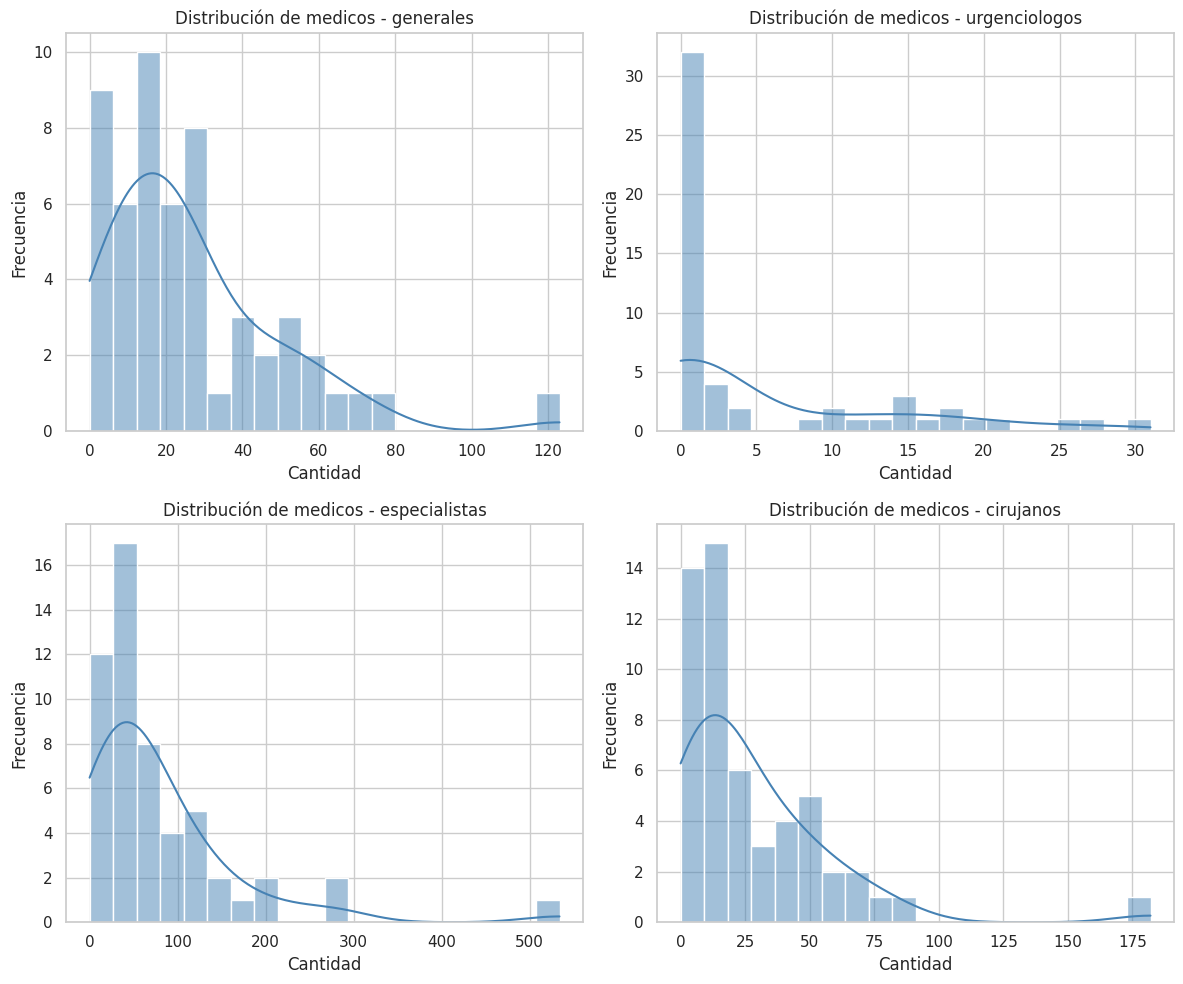

In [70]:

s.set(style="whitegrid")
plt.figure(figsize=(12, 10))

variables = ['medicos_generales', 'medicos_urgenciologos',
             'medicos_especialistas', 'medicos_cirujanos']
titulos = ['generales', 'urgenciologos', 'especialistas', 'cirujanos']

for i, var in enumerate(variables):
    plt.subplot(2, 2, i + 1)
    s.histplot(df_medicos[var], kde=True, bins=20, color='steelblue')
    plt.title(f'Distribución de medicos - {titulos[i]}')
    plt.xlabel('Cantidad')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [71]:

x = df_medicos["medicos_generales"].dropna()

stat_shapiro, p_shapiro = shapiro(x)
print(f"Shapiro-Wilk: Estadístico = {stat_shapiro:.4f}, p-valor = {p_shapiro:.4f}")

skewness = skew(x)
print(f"Asimetría (skewness) = {skewness:.4f}")
if skewness > 0:
    print("Distribución sesgada a la derecha.")
elif skewness < 0:
    print("Distribución sesgada a la izquierda.")
else:
    print("Distribución simétrica.")

Shapiro-Wilk: Estadístico = 0.8572, p-valor = 0.0000
Asimetría (skewness) = 1.6896
Distribución sesgada a la derecha.


In [72]:

x = df_medicos["medicos_urgenciologos"].dropna()


stat_shapiro, p_shapiro = shapiro(x)
print(f"Shapiro-Wilk: Estadístico = {stat_shapiro:.4f}, p-valor = {p_shapiro:.4f}")


skewness = skew(x)
print(f"Asimetría (skewness) = {skewness:.4f}")
if skewness > 0:
    print("Distribución sesgada a la derecha.")
elif skewness < 0:
    print("Distribución sesgada a la izquierda.")
else:
    print("Distribución simétrica.")

Shapiro-Wilk: Estadístico = 0.7071, p-valor = 0.0000
Asimetría (skewness) = 1.4424
Distribución sesgada a la derecha.



CORRELACION, TRANSFORMACIONES, UMBRALES (PREMODELADO)
---



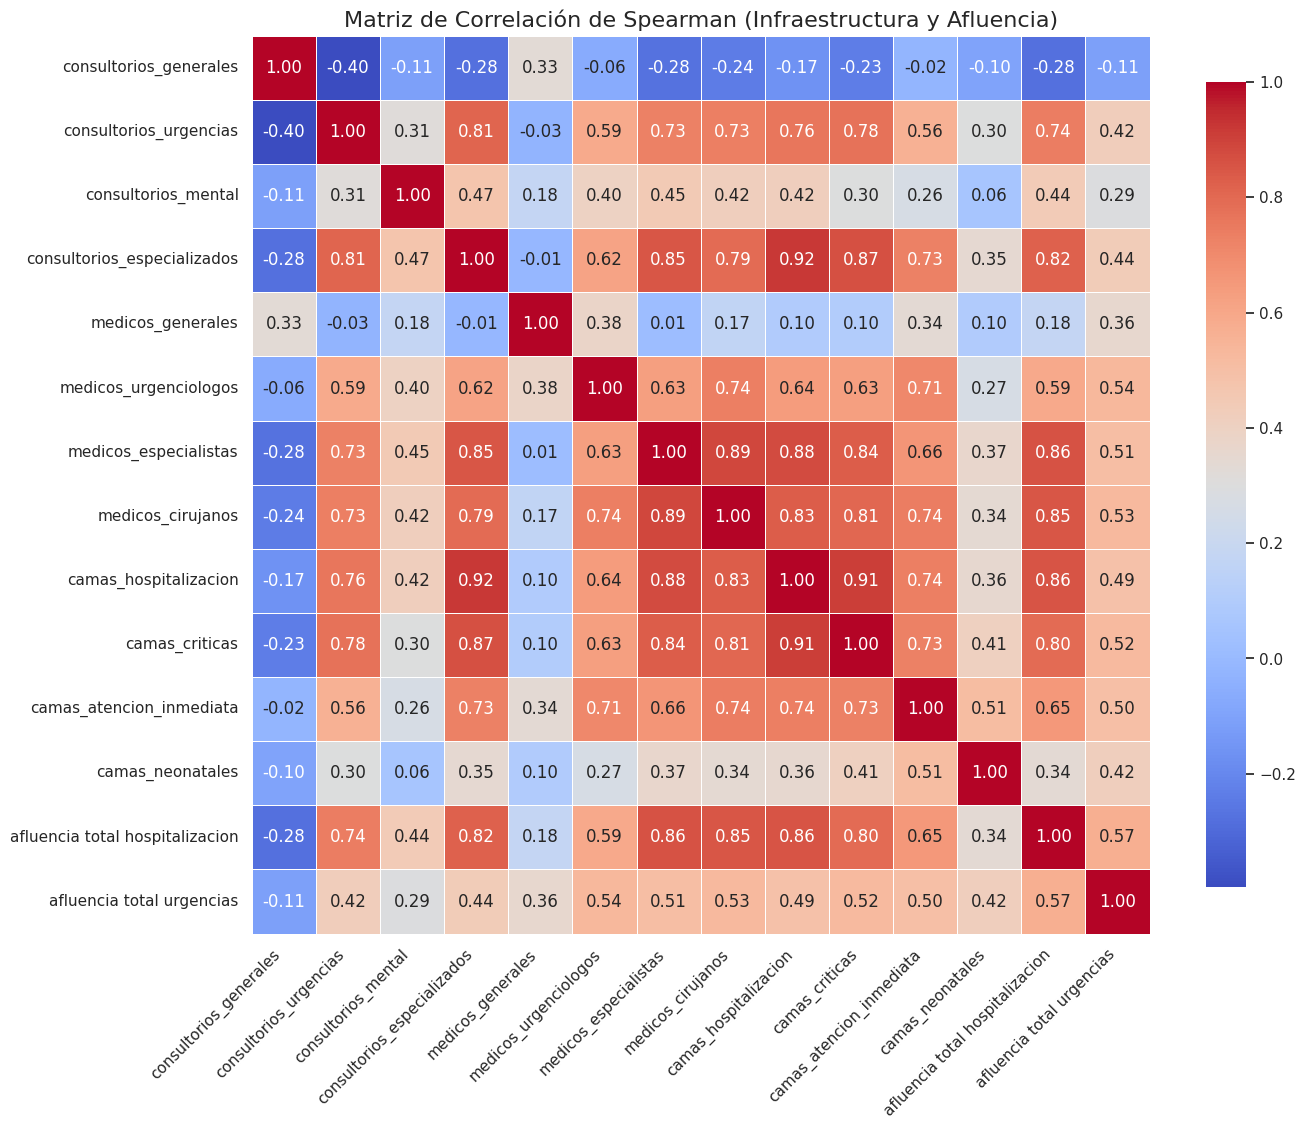

In [73]:
vars_all = [
    'consultorios_generales', 'consultorios_urgencias',
    'consultorios_mental', 'consultorios_especializados',
    'medicos_generales', 'medicos_urgenciologos',
    'medicos_especialistas', 'medicos_cirujanos',
    'camas_hospitalizacion', 'camas_criticas',
    'camas_atencion_inmediata', 'camas_neonatales',
    'afluencia total hospitalizacion','afluencia total urgencias'
]

# realizaremos una matriz de correlacion para todas las variables
corr_matrix = recursos_ho[vars_all].corr(method='spearman')

plt.figure(figsize=(14, 12))
s.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True,
            cbar_kws={"shrink": .8}, linewidths=.5)
plt.title("Matriz de Correlación de Spearman (Infraestructura y Afluencia)", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [74]:
recursos_ho['afluencia diaria urgencias'] = recursos_ho['afluencia total urgencias'] / 365
recursos_ho['afluencia diaria hospitalizacion'] = recursos_ho['afluencia total hospitalizacion'] / 365

<ipython-input-74-1188861048>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recursos_ho['afluencia diaria urgencias'] = recursos_ho['afluencia total urgencias'] / 365
<ipython-input-74-1188861048>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recursos_ho['afluencia diaria hospitalizacion'] = recursos_ho['afluencia total hospitalizacion'] / 365


In [75]:
#imputacion de datos faltantes
recursos_ho['afluencia diaria urgencias'].fillna(recursos_ho['afluencia diaria urgencias'].median(), inplace=True)
recursos_ho['afluencia diaria hospitalizacion'].fillna(recursos_ho['afluencia diaria hospitalizacion'].median(), inplace=True)


<ipython-input-75-3469252882>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  recursos_ho['afluencia diaria urgencias'].fillna(recursos_ho['afluencia diaria urgencias'].median(), inplace=True)
<ipython-input-75-3469252882>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recursos_ho['afluencia diaria urgencias'].fillna(recursos_ho['afluencia 

agregamos la variable de afluencia por dia

In [76]:
#mostramos el numero de ceros por columna
(recursos_ho == 0).sum().loc[lambda x: x > 0]


,0
E13,1
C1301,32
C1302,22
C1303,24
C1304,28
C1305,26
C1306,12
C1307,44
C1308,27
C1309,34


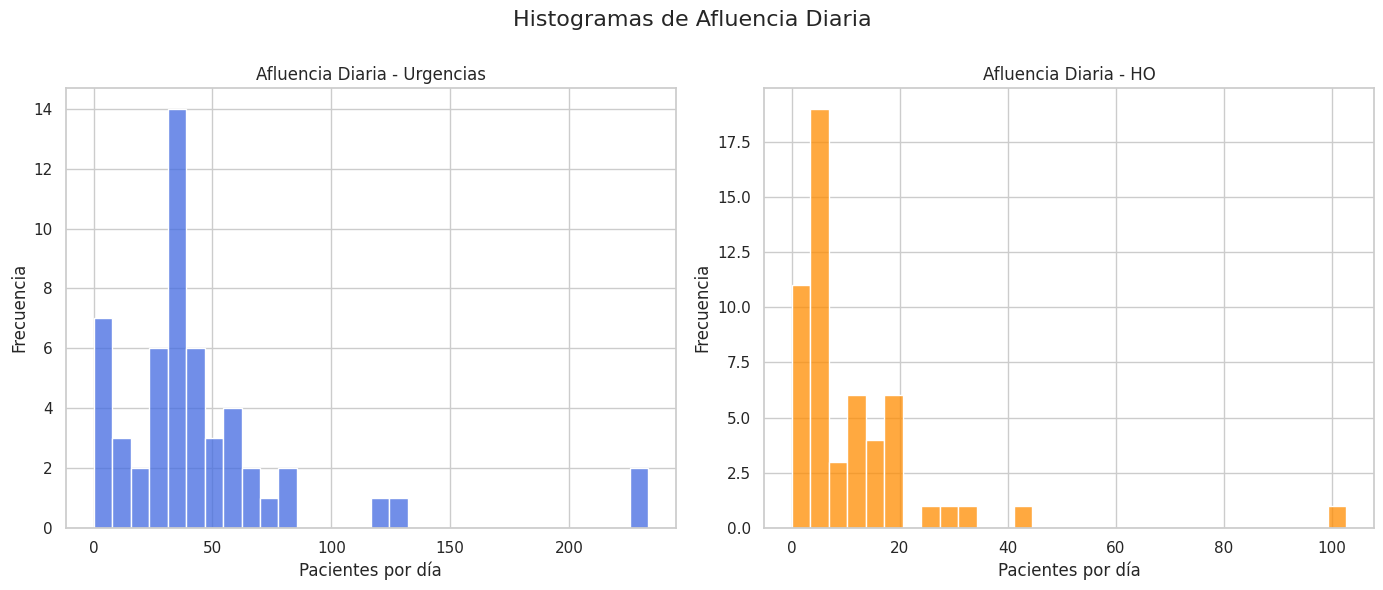

In [77]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Histogramas de Afluencia Diaria', fontsize=16)

# Histograma de urgencias
s.histplot(recursos_ho['afluencia diaria urgencias'].dropna(), bins=30, kde=False, ax=axs[0], color='royalblue')
axs[0].set_title('Afluencia Diaria - Urgencias')
axs[0].set_xlabel('Pacientes por día')
axs[0].set_ylabel('Frecuencia')

# Histograma de egresos
s.histplot(recursos_ho['afluencia diaria hospitalizacion'].dropna(), bins=30, kde=False, ax=axs[1], color='darkorange')
axs[1].set_title('Afluencia Diaria - HO')
axs[1].set_xlabel('Pacientes por día')
axs[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

observamos que la afluencia diaria en promedio no suele ser grave o mas bien, no fue grave en 2023, y la mayoria de valores esta concentrado hacia 0 a 20 pacientes por dia en el caso de nuevas hospitalizaciones y de 0 a 80 urgenias diarias.




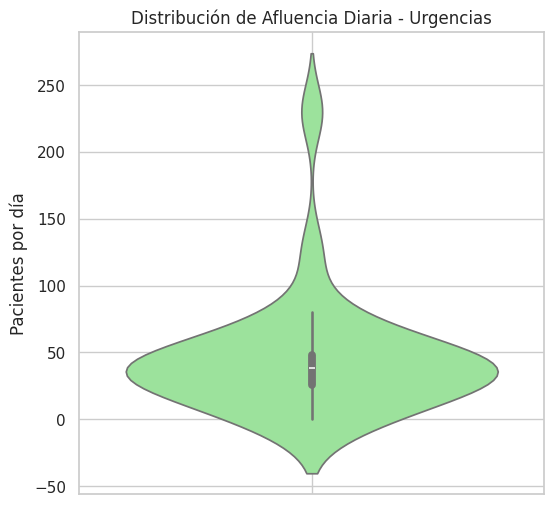

In [78]:
plt.figure(figsize=(6, 6))
s.violinplot(y=recursos_ho['afluencia diaria urgencias'].dropna(), color='lightgreen')
plt.title('Distribución de Afluencia Diaria - Urgencias')
plt.ylabel('Pacientes por día')
plt.grid(True)
plt.show()


generamos las tasas que se considera mas importantes como indicadores de riesgo, previamente consultadas por el mapa de correlacion

In [79]:
recursos_ho['tasa_afluenciau/camas_atencioni'] = recursos_ho['afluencia diaria urgencias'] / recursos_ho['camas_atencion_inmediata']
recursos_ho['tasa_afluenciau/medicos_urg'] = recursos_ho['afluencia diaria urgencias'] / recursos_ho['medicos_urgenciologos']
recursos_ho['tasa_afluenciau/consultorios_urg'] = recursos_ho['afluencia diaria urgencias'] / recursos_ho['consultorios_urgencias']
recursos_ho['tasa_afluenciau/medicos_cir'] = recursos_ho['afluencia diaria urgencias'] / recursos_ho['medicos_cirujanos']
recursos_ho['tasa_afluenciah/camas_hosp'] = recursos_ho['afluencia diaria hospitalizacion'] / recursos_ho['camas_hospitalizacion']
recursos_ho['tasa_afluenciah/medicos_esp'] = recursos_ho['afluencia diaria hospitalizacion'] / recursos_ho['medicos_especialistas']
recursos_ho['tasa_afluenciah/camas_crit'] = recursos_ho['afluencia diaria hospitalizacion'] / recursos_ho['camas_criticas']
recursos_ho['tasa_aflueniah/consultorios_esp'] = recursos_ho['afluencia diaria hospitalizacion'] / recursos_ho['consultorios_especializados']
recursos_ho['tasa_afluenciah/consultorios_gen'] = recursos_ho['afluencia diaria hospitalizacion'] / recursos_ho['consultorios_generales']
recursos_ho['tasa_afluenciah/medicos_gen'] = recursos_ho['afluencia diaria hospitalizacion'] / recursos_ho['medicos_generales']



<ipython-input-79-1296592142>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recursos_ho['tasa_afluenciau/camas_atencioni'] = recursos_ho['afluencia diaria urgencias'] / recursos_ho['camas_atencion_inmediata']
<ipython-input-79-1296592142>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recursos_ho['tasa_afluenciau/medicos_urg'] = recursos_ho['afluencia diaria urgencias'] / recursos_ho['medicos_urgenciologos']
<ipython-input-79-1296592142>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy

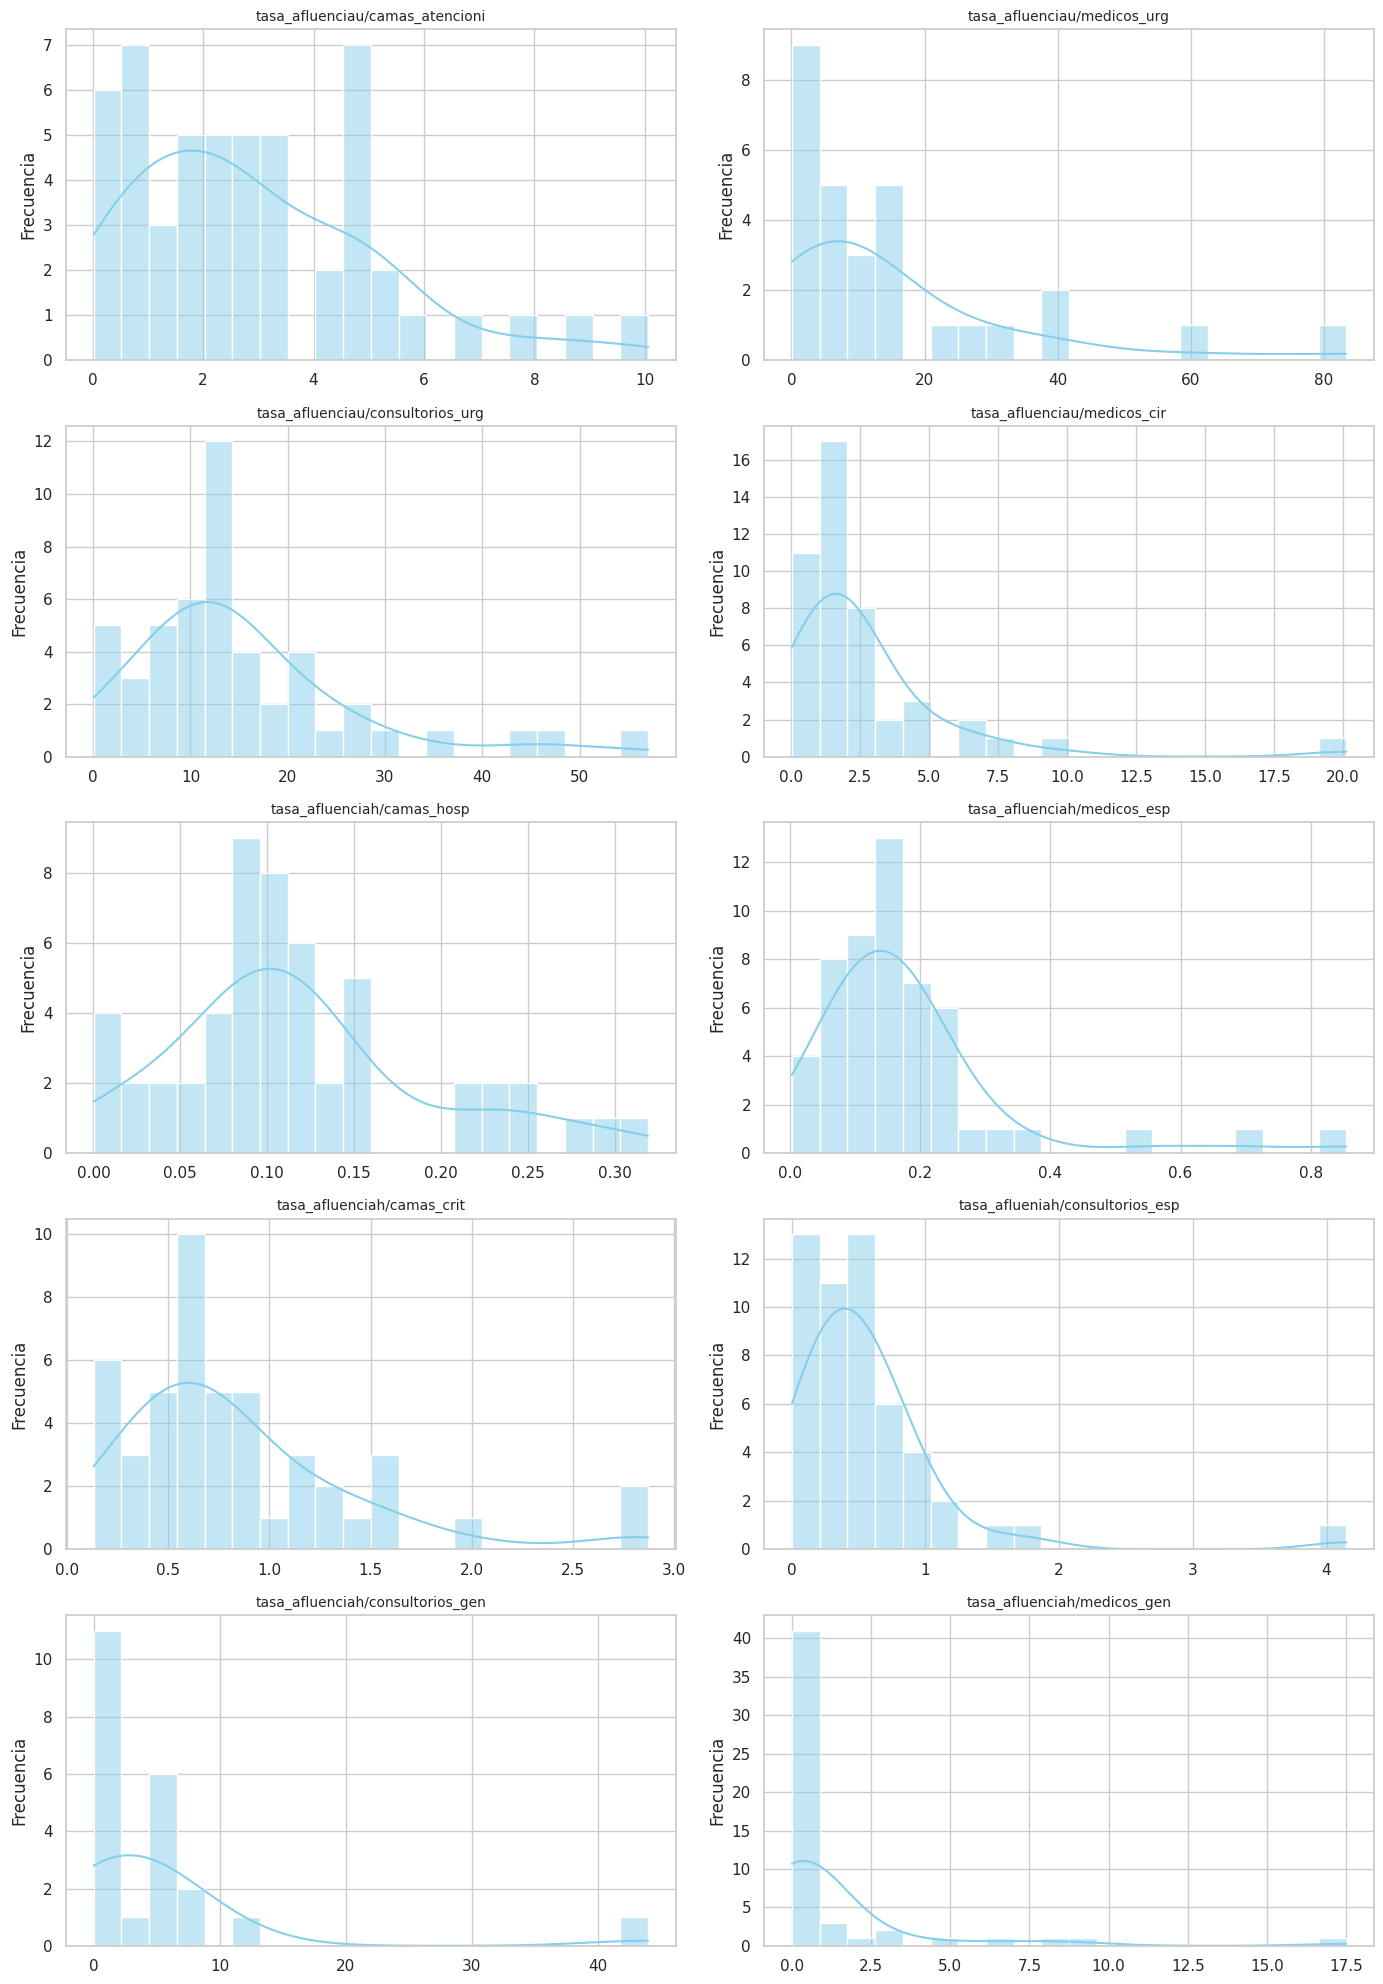

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Listamos las variables 'tasas'
tasa_vars = [
    'tasa_afluenciau/camas_atencioni',
    'tasa_afluenciau/medicos_urg',
    'tasa_afluenciau/consultorios_urg',
    'tasa_afluenciau/medicos_cir',
    'tasa_afluenciah/camas_hosp',
    'tasa_afluenciah/medicos_esp',
    'tasa_afluenciah/camas_crit',
    'tasa_aflueniah/consultorios_esp',
    'tasa_afluenciah/consultorios_gen',
    'tasa_afluenciah/medicos_gen'
]

# Definir la matriz de subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 20))
axes = axes.flatten()

# Graficar cada tasa
for i, var in enumerate(tasa_vars):
    sns.histplot(data=recursos_ho, x=var, kde=True, ax=axes[i], bins=20, color='skyblue')
    axes[i].set_title(var, fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


In [81]:
recursos_ho.replace([np.inf, -np.inf], 1.1, inplace=True)

<ipython-input-81-995411827>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recursos_ho.replace([np.inf, -np.inf], 1.1, inplace=True)


In [82]:
#los valosres inf se deben precisamente debido a datos con valor en cero en las variables previas a las tasas, se hizo una imputacion con un valor cercano
#se utilizo el valor de 1.1 pues evita problemas tecnicos en los calculos y el resultado es el mismo que el no tener ese tipo de recrusos para la poblacion
recursos_ho = recursos_ho[recursos_ho['NOMBRE DEL ESTABLECIMIENTO'] != 'UNIDAD TEMPORAL AJUSCO MEDIO']
#la unidad anterior no tenia datos registrados de ningun tipo, gracias a este analisis se pudo detectar y se eliminara para evitar mas sesgo.




ARBOL DE DESICION
---



In [83]:
tasas = [
    'tasa_afluenciau/camas_atencioni',
    'tasa_afluenciau/medicos_urg',
    'tasa_afluenciau/consultorios_urg',
    'tasa_afluenciau/medicos_cir',
    'tasa_afluenciah/camas_hosp',
    'tasa_afluenciah/medicos_esp',
    'tasa_afluenciah/camas_crit',
    'tasa_aflueniah/consultorios_esp',
    'tasa_afluenciah/consultorios_gen',
    'tasa_afluenciah/medicos_gen'
]
# Seleccionamos las columnas deseadas
df_modelado = recursos_ho[tasas].copy()

In [84]:
#creamos los umbrales con los criterior establecidos de riesgo bajo (menor a 0.7), moderado (de 0.7 a 1) alto (mayor o igual a 1)
for tasa in tasas:
    df_modelado[f'riesgo_{tasa}'] = pd.cut(df_modelado[tasa],
        bins=[-np.inf, 0.7, 1, np.inf],
        labels=[1, 2, 3]
    ).astype(int)

def clasificar_riesgo_global(fila):
    # Conteo de tasas
    riesgos_criticos = sum([fila[f'riesgo_{t}'] == 3 for t in tasas])
    riesgos_altos = sum([fila[f'riesgo_{t}'] == 2 for t in tasas])

    if riesgos_criticos >=6:
        return 3  # riesgo alto
    elif riesgos_criticos + riesgos_altos >= 5:
        return 2  # Riesgo moderado
    else:
        return 1 # Riesgo bajo

In [85]:
df_modelado['riesgo_global'] = df_modelado.apply(clasificar_riesgo_global, axis=1)


In [86]:
df_modelado['riesgo_global'].value_counts()

,count
riesgo_global,
2,27
3,19
1,7


observamos que dado nuestro criterio, registramos 27 hospitaes en riesgo moderado, 19 en riesgo alto y 7 en riesgo bajo

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

tasas = [
    'tasa_afluenciau/camas_atencioni',
    'tasa_afluenciau/medicos_urg',
    'tasa_afluenciau/consultorios_urg',
    'tasa_afluenciau/medicos_cir',
    'tasa_afluenciah/camas_hosp',
    'tasa_afluenciah/medicos_esp',
    'tasa_afluenciah/camas_crit',
    'tasa_aflueniah/consultorios_esp',
    'tasa_afluenciah/consultorios_gen',
    'tasa_afluenciah/medicos_gen'
]

#variables predictoras
X = df_modelado[tasas]
y = df_modelado['riesgo_global']  # o 'riesgo_global_reagrupado'

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.35, random_state=42, stratify=y
)

# 3. Modelo
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_train, y_train)

# 4. Predicción y evaluación
y_pred = modelo.predict(X_test)
print("RESULTADOS PARA: RIESGO GLOBAL- ARBOL DE DESICION")
print(classification_report(y_test, y_pred))




RESULTADOS PARA: RIESGO GLOBAL- ARBOL DE DESICION
              precision    recall  f1-score   support

           1       0.33      1.00      0.50         2
           2       0.78      0.70      0.74        10
           3       1.00      0.57      0.73         7

    accuracy                           0.68        19
   macro avg       0.70      0.76      0.65        19
weighted avg       0.81      0.68      0.71        19



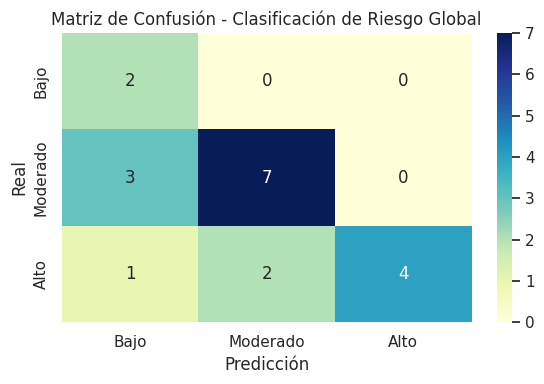

In [88]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Matriz de confusión
matriz = confusion_matrix(y_test, y_pred, labels=[1, 2, 3])

# 2. Visualización con seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(matriz, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=["Bajo", "Moderado", "Alto"],
            yticklabels=["Bajo", "Moderado", "Alto"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - Clasificación de Riesgo Global")
plt.tight_layout()
plt.show()

observamos metricas medianamente aceptables para tres categorias, observamos un accuracy de 68% lo que es aceptable para este primer modelo creado, sin embargo, en terminos aplicables, no seria un buen modelo. Los analisis se realizan en el reporte.


modelo KNN
---



RESULTADOS PARA: RIESGO GLOBAL - KNN
              precision    recall  f1-score   support

           1       0.33      0.50      0.40         2
           2       0.58      0.70      0.64        10
           3       0.50      0.29      0.36         7

    accuracy                           0.53        19
   macro avg       0.47      0.50      0.47        19
weighted avg       0.53      0.53      0.51        19



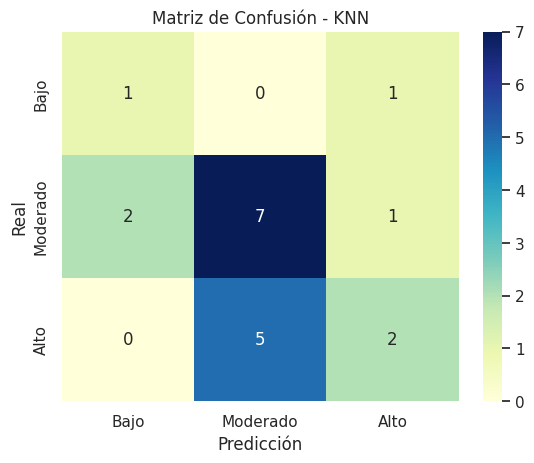

In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


knn = KNeighborsClassifier(n_neighbors=5)  # Puedes probar con otros valores de k
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

print("RESULTADOS PARA: RIESGO GLOBAL - KNN")
print(classification_report(y_test, y_pred_knn))

# Matriz de confusión
mat = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(mat, annot=True, fmt="d", cmap="YlGnBu", xticklabels=["Bajo", "Moderado", "Alto"], yticklabels=["Bajo", "Moderado", "Alto"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - KNN")
plt.show()


observamos una menor eficiencia respecto al anterior modelo, total de 53%.

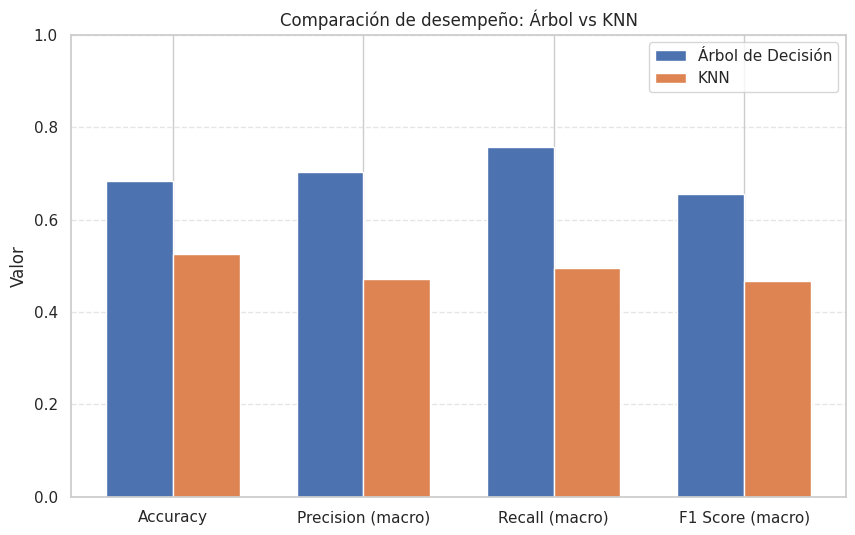

In [90]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Métricas arbol de desicion
acc_tree = accuracy_score(y_test, y_pred)
prec_tree = precision_score(y_test, y_pred, average='macro')
recall_tree = recall_score(y_test, y_pred, average='macro')
f1_tree = f1_score(y_test, y_pred, average='macro')

# Métricas para KNN
acc_knn = accuracy_score(y_test, y_pred_knn)
prec_knn = precision_score(y_test, y_pred_knn, average='macro')
recall_knn = recall_score(y_test, y_pred_knn, average='macro')
f1_knn = f1_score(y_test, y_pred_knn, average='macro')

# aqui se comparan
import matplotlib.pyplot as plt

metricas = ['Accuracy', 'Precision (macro)', 'Recall (macro)', 'F1 Score (macro)']
modelo_arbol = [acc_tree, prec_tree, recall_tree, f1_tree]
modelo_knn = [acc_knn, prec_knn, recall_knn, f1_knn]

x = np.arange(len(metricas))
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, modelo_arbol, width, label='Árbol de Decisión')
plt.bar(x + width/2, modelo_knn, width, label='KNN')

plt.xticks(x, metricas)
plt.ylabel("Valor")
plt.title("Comparación de desempeño: Árbol vs KNN")
plt.legend()
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


Observamos que las metricas del primer modelo son superiores al KNN. Sin embargo, no alcanzan la eficiencia que se requiere en un modelo util para la practica (valores de 80% y 90%). Esto es atribuible precisamente al analisis y pre procesamiento de los datos.